<a href="https://colab.research.google.com/github/tahir-97/Netflix_Tv_-_Movies/blob/main/Tahir%7C_Netflix_Movies_%26_TV_shows_Clustering_Unsupervised_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**-
**Netflix Movies & TV shows Clustering -Unsupervised Learning**



##### **Project Type**    - Unsupervised Learning

**Contribution** -  Individual  

# **Project Summary -**


The project's objective is to analyze a dataset related to **Netflix, focusing on attributes like title, genre, release year, duration, and rating. The goal is to identify patterns and similarities in the content and form meaningful clusters.**

The initial steps involve preprocessing the dataset by handling missing values, removing irrelevant columns, and converting categorical variables into numerical representations. Feature engineering may also be applied to extract valuable information.

Subsequently, **exploratory data analysis (EDA) techniques will be employed to gain insights into the dataset. Visualizations and statistical summaries will help understand variable distributions, identify trends, and explore feature relationships.**

**Clustering algorithms like k-means, hierarchical clustering, or density-based spatial clustering will be applied to group similar Netflix shows and movies based on their attributes. Determining the optimal number of clusters will be done using methods like the elbow method or silhouette analysis.**

After clustering, the results will be evaluated and interpreted to understand common characteristics within each group. This analysis will inform Netflix on content categorization, recommendation systems, and content acquisition strategies.

The project's outcomes will be summarized and presented using visualizations, charts, and graphs. Recommendations, based on the identified clusters, may be provided for Netflix to enhance user experience and content offerings.

In conclusion, this project aims to analyze a Netflix dataset, apply clustering techniques to group similar content, and present insights and recommendations. The findings will contribute to a better understanding of Netflix's content landscape, supporting decision-making for the company.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The dataset comprises TV shows and movies accessible on Netflix in 2019, sourced from Flixable, an external Netflix search engine. In 2018, Flixable reported a significant finding: the quantity of TV shows on Netflix has almost tripled since 2010, contrasting with a reduction of over 2,000 movie titles during the same period. This dataset offers an intriguing opportunity to delve further into additional insights it may provide.





# ***Let's Begin !***

## ***1. Know Your Data***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [2]:
# Import Libraries

# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [4]:
#Loading the dataset
path = '/content/drive/MyDrive/ALMABETTER/MACHINE LEARNING/UNSUPERVISED /PROJECT/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
netflix_movies = pd.read_csv(path)

In [5]:
# Dataset First Look
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
netflix_movies.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
netflix_movies_copy = netflix_movies.copy() # save for later use

In [8]:
netflix_movies['title'].value_counts()

3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: title, Length: 7787, dtype: int64

### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
netflix_movies.index

RangeIndex(start=0, stop=7787, step=1)

In [10]:
netflix_movies.shape

(7787, 12)

In [11]:
netflix_movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Information

In [12]:
# Dataset Info
netflix_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
netflix_movies.duplicated().sum()

0

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
netflix_movies.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [15]:
#total null values in the netflix Dataset
netflix_movies.isnull().sum().sum()

3631

In [16]:
# Visualizing the missing values
#Handling Null Values
netflix_movies['cast'].fillna(value='No cast',inplace=True)
netflix_movies['country'].fillna(value=netflix_movies['country'].mode()[0],inplace=True)

In [17]:
netflix_movies.shape

(7787, 12)

### **What did you know about your dataset?**





**Answer Here**

This dataset comprises details about a variety of TV shows and movies accessible on Netflix. It includes information such as the production country, release year, rating, duration, genre, and a description for each title. The dataset consists of 12 columns and 7787 rows.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
netflix_movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:
# Dataset Describe
netflix_movies.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7787,7787,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6832,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",No cast,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,718,3062,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### **Variables Description**


**Attribute Details**

**show_id:** Unique identifier for each Movie/TV Show.

**type:** Identification tag indicating whether it's a Movie or TV Show.

**title:** The name of the Movie/TV Show.

**director:** The director of the Movie.

**cast:** The actors involved in the Movie/Show.

**country:** The country where the Movie/Show was produced.

**date_added:** The date when it was added to Netflix.

**release_year:** The actual release year of the Movie/Show.

**rating:** The TV rating assigned to the Movie/Show.

**duration:** The total duration, either in minutes or the number of seasons.

**listed_in:** Genre classification.

**description:** A concise summary description.



### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
print(netflix_movies.apply(lambda col: col.unique()))


show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object


In [21]:
# Convert 'date_added' column to datetime format
netflix_movies['date_added'] = pd.to_datetime(netflix_movies['date_added'])

# Create new features for day, year, and month
netflix_movies['day_added'] = netflix_movies['date_added'].dt.day
netflix_movies['year_added'] = netflix_movies['date_added'].dt.year
netflix_movies['month_added'] = netflix_movies['date_added'].dt.month


### **What all manipulations have you done and insights you found?**

**Answer Here.**

We can derive the following insights from the dataset:

**Director:** The "Director" column contains missing values.

**Country:** The "Country" column has missing values, which have been replaced with zero.

**Cast:** The "Cast" column has missing values, filled with "No cast."

**Date Added:** The "Date Added" column has missing values.

**Duplicated Entries:** Duplicate entries have been identified in the dataset, with a sum of zero.

**Unique Values:** Each column contains unique items.

**Date_added Column:** In the "Date Added" column, additional information has been extracted, including the day, month, and year.

**In summary, the dataset exhibits missing values in the director, country, cast, and date added columns. Missing values in the cast column have been filled with "No cast," while those in the country column have been replaced with zero. Duplicate entries have been detected, and the sum of values in one column is zero.** Each column contains distinct unique values. Furthermore, the date added column has been processed to extract details such as the day, month, and year.















## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

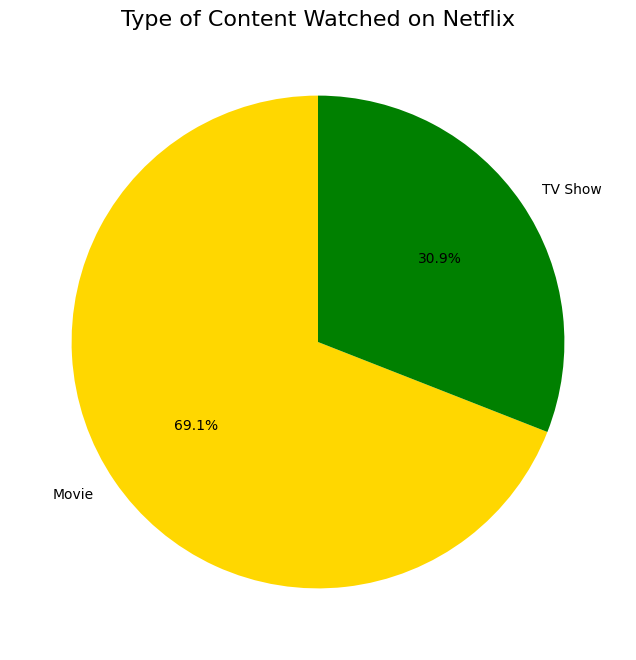

In [22]:
# Count the occurrences of each type
type_counts = netflix_movies['type'].value_counts()

# Plot a pie chart
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the pie chart
ax.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ffd700', '#008000'])

# Customize layout
ax.set_title('Type of Content Watched on Netflix', fontsize=16)

# Display the plot
plt.show()








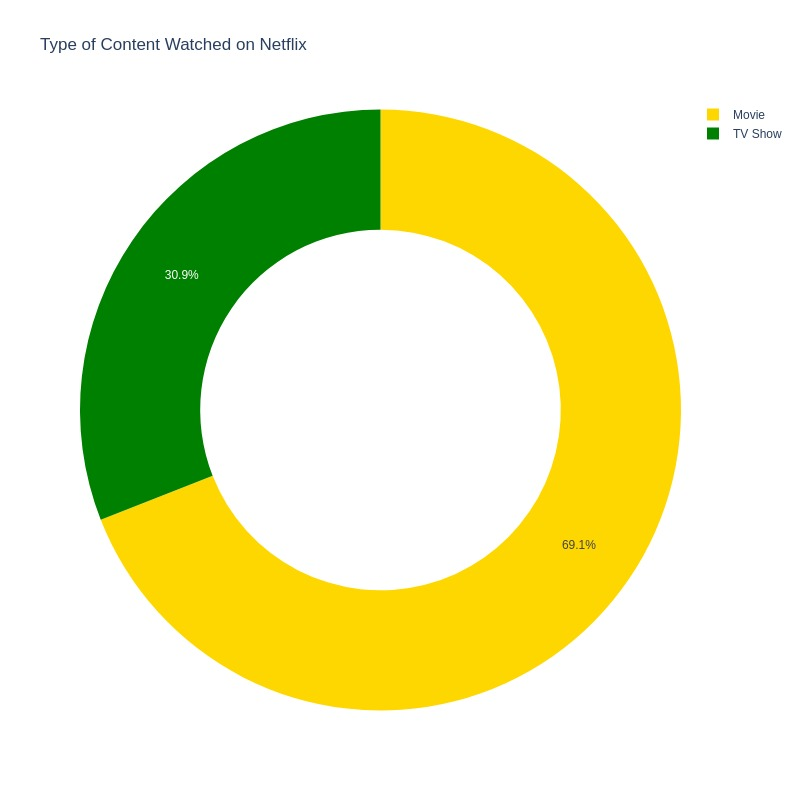

In [23]:
# Import necessary libraries
import plotly.express as px
from IPython.display import Image

# Create a pie chart using Plotly Express
fig = px.pie(netflix_movies, names='type', title='Type of Content Watched on Netflix', hole=0.6,
             color_discrete_sequence=['#ffd700', '#008000'])

# Display the pie chart
Image(fig.to_image(format="jpeg", width=800, height=800, scale=1))


##### **1. Why did you pick the specific chart?**








Answer Here.

The chosen chart in the provided code is a pie chart, selected for its effectiveness in illustrating the distribution of categorical data. In this instance, the chart visually represents the types of content viewed on Netflix, specifically categorized as "TV Show" and "Movie."

#####**2. What is/are the insight(s) found from the chart?**





**Answer Here**
The majority of content watched on Netflix is comprised of TV shows, making up 69.1%, while movies constitute a smaller portion at 30.9%.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Answer Here


The data clearly shows a preference for TV shows over movies, with a notably higher percentage of 69.1% for TV shows compared to the lower percentage of 30.9% for movies. This implies that individuals lean towards shorter formats, such as TV shows, rather than dedicating their time to longer movies that might be less captivating.

#### Chart - 2

In [24]:
# Chart - 2 visualization code
import plotly.graph_objects as go

# Separate TV shows and movies
tv_shows = netflix_movies[netflix_movies["type"] == "TV Show"]
movies = netflix_movies[netflix_movies["type"] == "Movie"]

# Select the column for analysis
column = "year_added"

# Count occurrences for TV shows and movies
tv_show_counts = tv_shows[column].value_counts().sort_index()
movie_counts = movies[column].value_counts().sort_index()

# Create traces for each category
trace_tv_show = go.Scatter(x=tv_show_counts.index, y=tv_show_counts.values, name="TV Shows",
                           marker=dict(color='#008000', line=dict(width=4)))
trace_movie = go.Scatter(x=movie_counts.index, y=movie_counts.values, name="Movies",
                         marker=dict(color='#ffd700', line=dict(width=4)))

# Create figure layout
fig_layout = go.Layout(title="Content added over the years", title_x=0.5, legend=dict(x=0.8, y=1.1, orientation="h"))

# Create the figure
fig = go.Figure(data=[trace_tv_show, trace_movie], layout=fig_layout)

# Display the chart
fig.show()


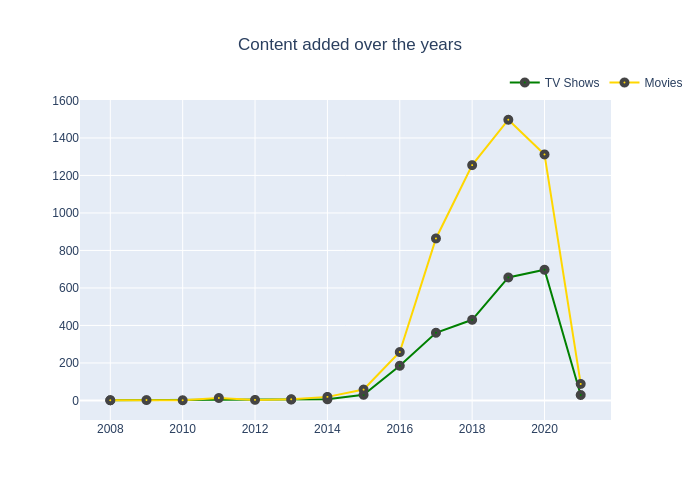

In [25]:
# Use plotly.io to save the figure as an image
import plotly.io as pio

# Save the figure as an image file
img_path = "content_added_over_years.png"
pio.write_image(fig, img_path)

# Display the saved image
Image(filename=img_path)


##### **1. Why did you pick the specific chart?**

**Answer Here.**

The line chart is well-suited for illustrating the pattern and dispersion of data along a continuous axis, which, in this instance, represents the years. It facilitates straightforward comparison between the counts of TV shows and movies, revealing how their quantities fluctuate throughout the years.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The pattern observed in the visualization suggests that from 2008 to 2022, the addition of TV shows and movies to Netflix remained comparatively low. However, starting from 2016, there was a slight upturn in content additions. Notably, in 2019, there was a substantial surge in the number of added movies, while TV shows exhibited a similar trend but with a less pronounced increase compared to movies.


##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The obtained observations suggest a favorable outcome for Netflix, with a significant rise in demand for both TV shows and movies on the platform over the years. This upward trend creates a potential for Netflix to deliver an expanded range of high-quality content, leading to increased user satisfaction and engagement.

#### Chart - 3

In [26]:
# Chart - 3 visualization code

# Create a DataFrame to store month values and counts
months_df = netflix_movies['month_added'].value_counts().reset_index().rename(columns={'index': 'month', 'month_added': 'count'})

fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count', color_continuous_scale=['#0000FF', '#FFFF00'])
fig.update_layout(
    title={
        'text': 'Month wise Addition of Movies and TV Shows on Netflix',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=1000,
    height=500,
    showlegend=True)
fig.show()


In [27]:
fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count', color_continuous_scale=['#0000FF', '#FFFF00'])
fig.update_layout(
    title={
        'text': 'Month wise Addition of Movies and TV Shows on Netflix',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500,
        showlegend=True)
# fig.show()
fig.show()

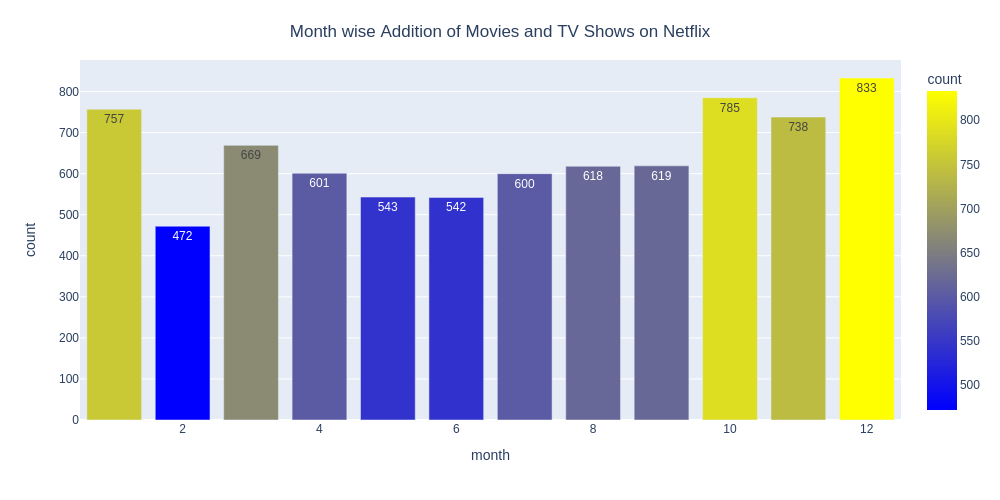

In [28]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1000, height=500, scale=1)
Image(img_bytes)

#####**1. Why did you pick the specific chart?**

**Answer Here.**
The bar chart is well-suited for the comparison and visualization of categorical data, specifically the counts associated with each month. This chart facilitates a clear understanding of how content additions are distributed throughout different months, enabling the identification of any discernible patterns or trends in the data.


##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

From October to December, there is a distinct increase in the release of TV shows and movies on the Netflix platform. These months are characterized by several holidays and celebrations, including Halloween, Diwali, Thanksgiving, and Christmas. These occasions often lead to increased leisure time at home, prompting individuals to explore entertainment options, such as watching TV shows and movies on Netflix.

#####**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The insights obtained regarding the upsurge in TV shows and movies on the Netflix platform during the October to December period have the potential to generate positive business outcomes. Here are a few reasons:

**1. Meeting Seasonal Demand**

**2. Retaining Existing Subscribers**

**3. Attracting New Subscribers**


#### Chart - 4

In [29]:
# Chart - 4 visualization code
import plotly.express as px

# Create a DataFrame to store month values and counts
months_df = pd.DataFrame(netflix_movies.groupby(['month_added', 'type']).size()).reset_index()
months_df.columns = ['month', 'type', 'count']

# Plot the countplot using Plotly Express
fig = px.bar(months_df, x="month", y="count", color="type",
             color_discrete_map={'Movie': '#FF0000', 'TV Show': '#0000FF'},
             labels={'count': 'Count', 'month': 'Month', 'type': 'Type'},
             title='Monthly Addition of Movies and TV Shows on Netflix',
             width=1000, height=500)
fig.show()


##### **1. Why did you pick the specific chart?**

**Answer Here.**


By employing a countplot, it becomes straightforward to visually assess and compare the occurrences of TV show and movie additions across each month.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

**Movies:**

January, October, and December stand out as the prominent months for the addition of movies on Netflix in comparison to other months.

**Tv Shows:**

October, November, and December take the spotlight as the leading months for the addition of TV shows on Netflix compared to other months.



##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**


The obtained insights regarding the months with a notable trend in movies and TV shows on Netflix have the potential to generate positive business impacts. Here are the reasons:

**1-Meeting Viewer Demand:**

**2-Capitalizing on Seasonal Trends:**

**3-Improved Competitiveness:**

#### Chart - 5

In [30]:
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,1.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",1.0,2020.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11.0,2020.0,1.0
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,19.0,2020.0,10.0
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,2019.0,3.0
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",25.0,2020.0,9.0


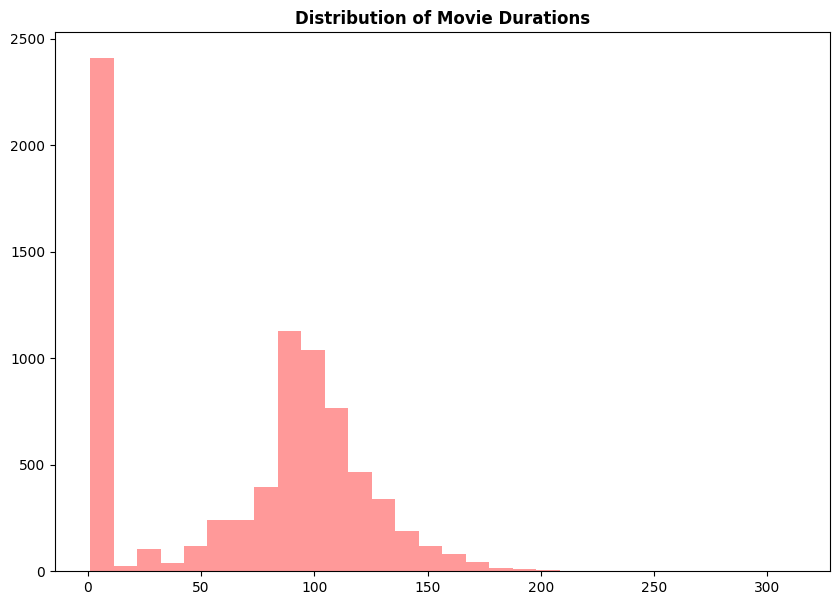

In [31]:
# Chart - 5 visualization code
# Checking the distribution of Movie Durations
plt.figure(figsize=(10, 7))
# Extracting digits from the 'duration' column using regular expression
movie_durations = netflix_movies['duration'].str.extract('(\d+)')
# Plotting the distribution with a red color
sns.distplot(movie_durations, kde=False, color='red')
plt.title('Distribution of Movie Durations', fontweight="bold")
plt.show()


1.**Why did you pick the specific chart?**


**Answer Here**

The Distplot is a suitable choice for this analysis because it allows us to observe the frequency or count of movies falling into different duration ranges.

2.**What is/are the insight(s) found from the chart?**

**Answer Here**

**Shorter Duration Movies (0 to 30 minutes):** There is a high frequency of movies with durations between 0 to 30 minutes, exceeding 2300. This suggests a substantial presence of short films, documentaries, or other content with brief durations on Netflix. Viewers on the platform may have a preference for quick and concise content

**Moderate Duration Movies (50 to 150 minutes):** In the duration range of 50 to 150 minutes, the frequency of movies ranges from 30 to 1200. This indicates a diverse range of movies with moderate durations. The distribution suggests that while there is a variety of content falling within this timeframe, it is not as densely populated as the shorter duration category.

**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

**Positive Business Impact:**

**Audience Flexibility:** Diversifying content lengths, encompassing both shorter films and longer epic productions, allows Netflix to accommodate the diverse preferences and schedules of its audience.

**Increased Engagement:** Offering movies and TV shows with varying lengths provides viewers with options that align with their available time. This, in turn, can lead to increased engagement and longer viewing sessions on the platform.

**Content Diversity:** Enriching its library with movies and TV shows of different lengths enables Netflix to expand its content diversity, catering to various genres and storytelling formats. This strategy enhances the platform's appeal to a broader audience with distinct viewing preferences.









<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

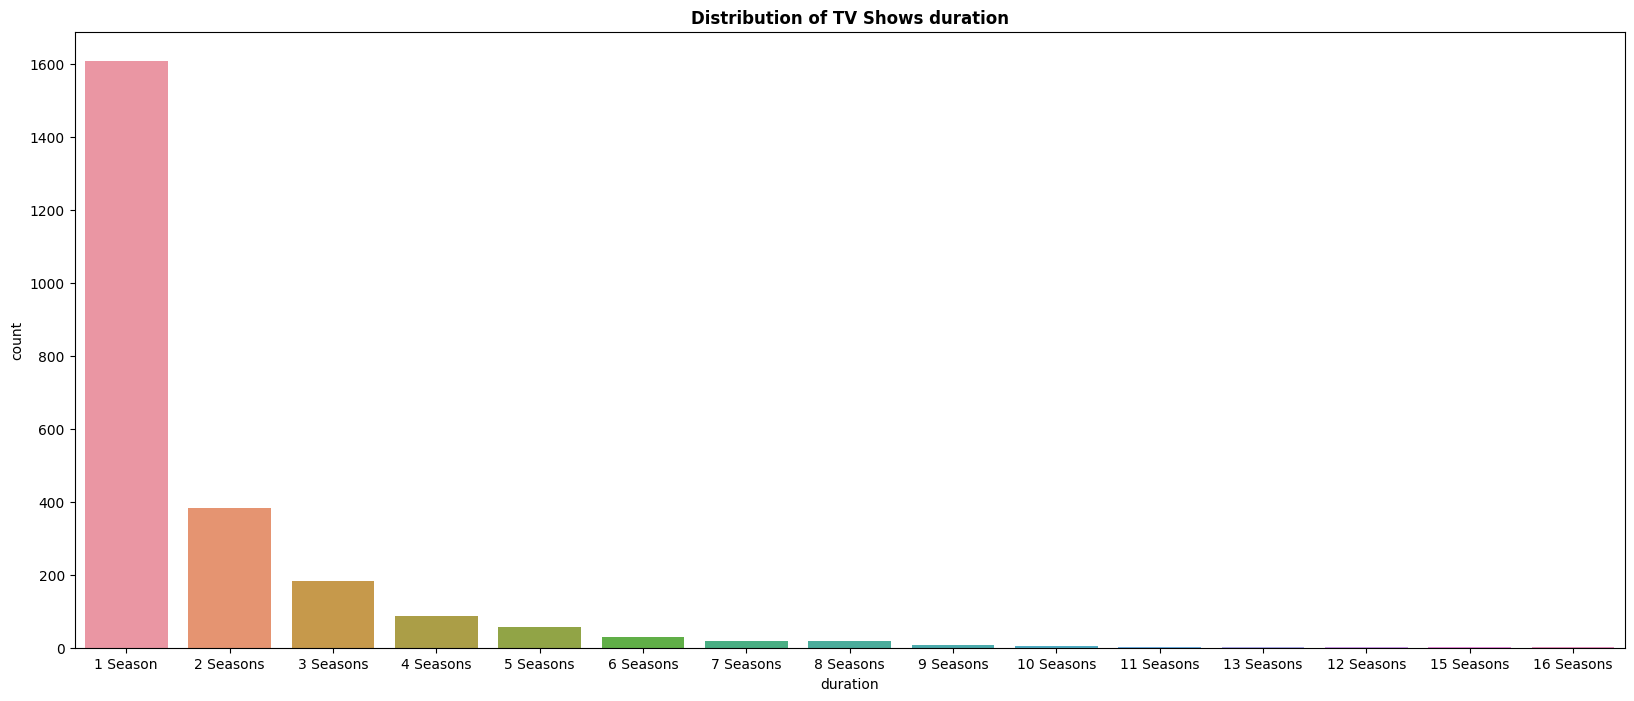

In [32]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(20,8))
plt.title("Distribution of TV Shows duration", fontweight='bold')
sns.countplot(x=netflix_movies[netflix_movies["type"] == "TV Show"]['duration'],
              data=netflix_movies[netflix_movies["type"] == "TV Show"],
              order=netflix_movies[netflix_movies["type"] == "TV Show"]['duration'].value_counts().index)


##### **1. Why did you pick the specific chart?**

**Answer Here.**


The chart in reference is a countplot, a variation of a bar chart that illustrates the frequency or count of each category within a categorical variable. It appears to be employed to visualize the distribution of TV show seasons.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**


Based on the chart, we can infer that a significant portion of TV shows or web series in the dataset consists of only one season. The remaining shows exhibit a distribution with a maximum of two, three, four, or five seasons.

#####**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Certainly, this observation has a positive impact. Recognizing that the majority of TV shows have a limited number of seasons allows content producers and streaming platforms to optimize their production planning. This optimization can lead to more efficient resource allocation, reduced production costs, and potentially increased content output.


#### Chart - 6

([<matplotlib.patches.Wedge at 0x7c3e1e2a01c0>,
 [Text(-0.8902585632950727, -0.6460957285726268, 'Others'),
  Text(0.9711911599582614, 0.7048317038974106, 'Originals')],
 [Text(-0.4855955799791305, -0.3524158519487055, '69.98%'),
  Text(0.5665281766423191, 0.4111518272734894, '30.02%')])

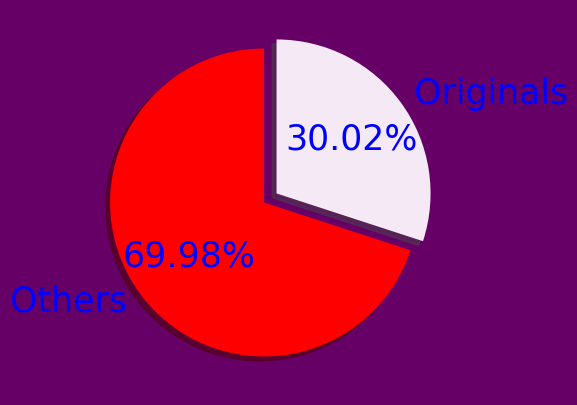

In [33]:
# Chart - 6 visualization code
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#660066")
ax.patch.set_facecolor("#660066")
explode = (0, 0.1)
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"blue", 'fontsize': 25}, colors =['red','#F5E9F5'])

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The pie plot has been chosen to effectively illustrate the distribution of categorical data, specifically the percentage of "originals" versus "others." This visualization method provides a clear representation of the relative sizes of each category in relation to the entire dataset.








##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Among the movies accessible on Netflix, 30% constitute Netflix originals, while the remaining 70% comprise films that were initially released through various distribution channels and later included in the Netflix library.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

acquiring insights can play a pivotal role in fostering a positive business impact. An in-depth comprehension of the movie distribution on Netflix, particularly the ratio between Netflix originals and non-originals, empowers the streaming service to make well-informed decisions regarding content acquisition and production.

#### Chart - 7

In [34]:
netflix_movies['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                              No cast
Name: cast, Length: 7787, dtype: object

In [35]:
# seperating actors from cast column
cast = netflix_movies['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

No cast             718
Anupam Kher          42
Shah Rukh Khan       35
Om Puri              30
Naseeruddin Shah     30
                   ... 
Archie Alemania       1
Demore Barnes         1
Marty Adams           1
Nicole Boivin         1
Rachel Khoo           1
Length: 32882, dtype: int64

In [36]:
# Filter out 'No cast' from the cast column
filtered_cast = cast[cast != 'No cast']

# Display the top actors excluding 'No cast'
filtered_cast.value_counts()


Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

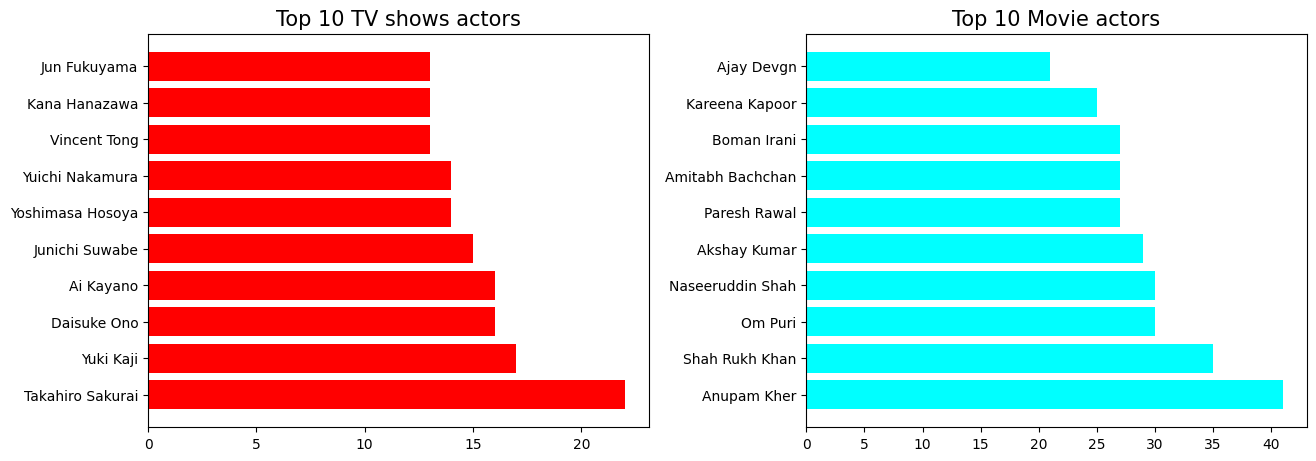

In [37]:
# Chart - 7 visualization code
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Separating TV shows actors from the cast column
top_TVshows_actor = netflix_movies[netflix_movies['type'] == 'TV Show']['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor = top_TVshows_actor[top_TVshows_actor != 'No cast']

# Plotting the top 10 TV shows actors
ax[0].barh(top_TVshows_actor.value_counts().head(10).index, top_TVshows_actor.value_counts().head(10), color='red')
ax[0].set_title('Top 10 TV shows actors', size=15)

# Separating movie actors from the cast column
top_movie_actor = netflix_movies[netflix_movies['type'] == 'Movie']['cast'].str.split(', ', expand=True).stack()
top_movie_actor = top_movie_actor[top_movie_actor != 'No cast']

# Plotting the top 10 movie actors
ax[1].barh(top_movie_actor.value_counts().head(10).index, top_movie_actor.value_counts().head(10), color='Cyan')
ax[1].set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()


##### **1. Why did you pick the specific chart?**

**Answer Here.**

The horizontal layout of the bars facilitates effortless reading and comparison of the values. Each bar's length corresponds to the number of appearances an actor has made in TV shows or movies. The chart is neatly divided into two subplots, clearly indicating that one subplot illustrates TV shows, while the other illustrates movies, providing a comprehensive view of the top actors in each category.


##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Within the TV shows category, Takahiro Sakurai emerges as the actor with the highest number of appearances, while in the movies category, Anupam Kher takes the lead in terms of the highest number of appearances.

**Chart - 8**

In [38]:
# Chart - 8 visualization code
top_10_genre = netflix_movies['listed_in'].value_counts().head(10)

fig = px.pie(top_10_genre, values=top_10_genre.values, names=top_10_genre.index)

custom_colors = ['#4c78a8', '#72b7b2', '#ff7f0e', '#2ca02c', '#d62728']
fig.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0,
                   marker=dict(colors=custom_colors))

fig.update_layout(height=600, width=900, title='Top 10 genres on Netflix',
                   margin=dict(t=100, b=30, l=0, r=0),
                   showlegend=False,
                   plot_bgcolor='#fafafa',
                   paper_bgcolor='#fafafa',
                   title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                   font=dict(size=12, color='#FF0000'),
                   hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

fig.show()


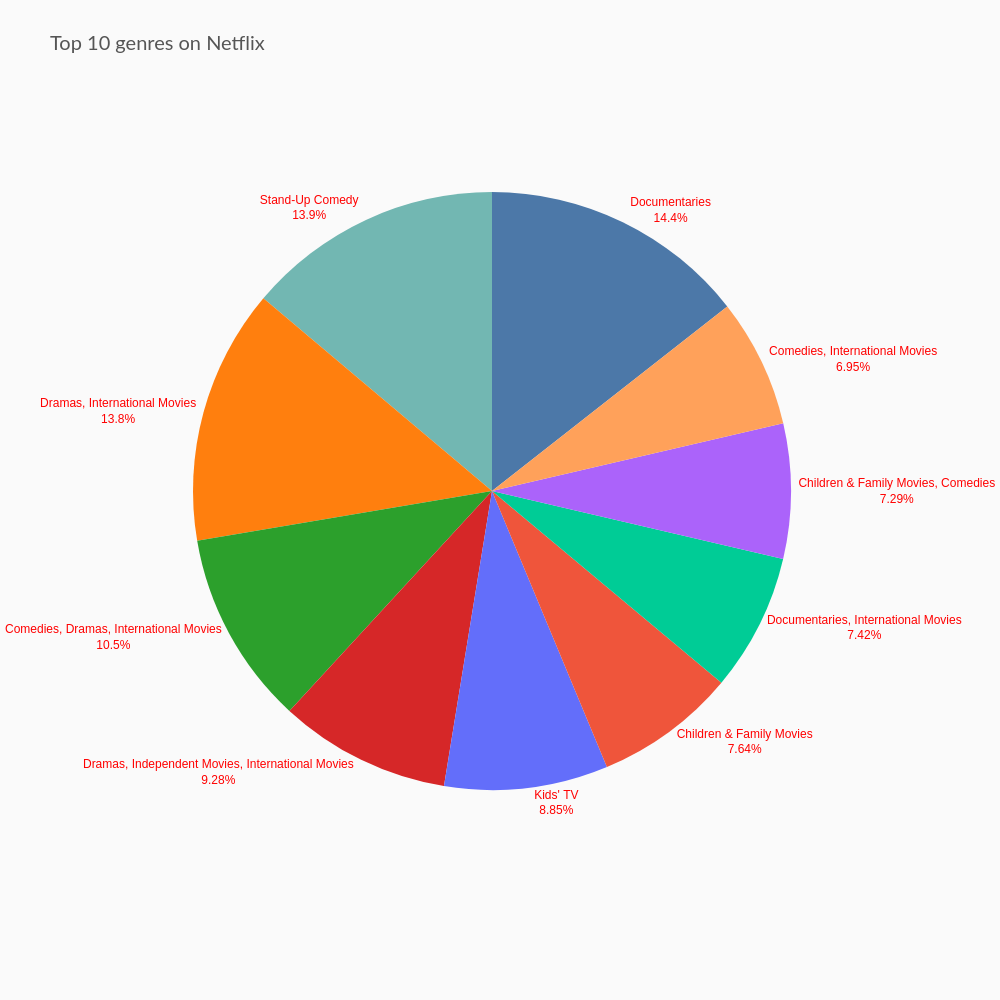

In [39]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1000, height=1000, scale=1)
Image(img_bytes)

1.**Why did you pick the specific chart?**

**Answer Here.**

The circular format of the pie chart facilitates a swift comparison of genre sizes by visually assessing the relative areas of each slice. Supplementary labels and percentage values positioned outside the slices offer additional details, enhancing the chart's readability.

2.**What is/are the insight(s) found from the chart?**

**Answer Here.**

In this visualization, the leading three genres on Netflix, as indicated by their share of distribution, are:

**1- Documentaries:** 14.4%

**2- Stand-up Comedy:** 13.9%

**3- Drama, International Movies:** 13.8%

These genres exhibit the highest proportions among the top 10 genres represented in the chart.

3.**Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here.**

The insights derived from examining the genre distribution on Netflix have the potential to generate positive business impacts through various avenues:

**1- Content Curation:** By prioritizing genres with substantial viewer demand, Netflix can ensure a varied and attractive array of movies and shows for its subscribers.

**2- Targeted Acquisitions and Productions:** This analysis can assist in recognizing genres with high demand and a proven audience, optimizing investments in content creation and acquisition.

**3- Personalized Recommendations:** Utilizing these insights can lead to personalized recommendations for individual users, enhancing their overall experience and encouraging increased engagement with the platform.


#### Chart - 8

In [40]:
# Chart - 8 visualization code
# Create subset of dataset with required data.
country_vs_genre = netflix_movies[['country', 'listed_in']]

# Create a function to separate all genres and store counts for each.
def country_wise_genre(country):
    country_genre = country_vs_genre[country_vs_genre['country'] == country]
    # Next, the function joins all the genre strings together into a single long string using the ", ".join()
    # method and then splits the long string into a list of individual genre strings using the split() method with ", " as the separator.
    country_genre = ", ".join(country_genre['listed_in'].dropna()).split(", ")
    country_genre_dict = dict(Counter(country_genre))
    return country_genre_dict


In [41]:
country_vs_genre

,country,listed_in
0,Brazil,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Mexico,"Dramas, International Movies"
2,Singapore,"Horror Movies, International Movies"
3,United States,"Action & Adventure, Independent Movies, Sci-Fi..."
4,United States,Dramas
...,...,...
7782,"Sweden, Czech Republic, United Kingdom, Denmar...","Dramas, International Movies"
7783,India,"Dramas, International Movies, Music & Musicals"
7784,United States,"Documentaries, International Movies, Music & M..."
7785,Australia,"International TV Shows, Reality TV"


In [42]:
# Different way - Chart 9 visualization code
# Define list of top ten countries.
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
    genre_data = country_wise_genre(i)
    country_wise_genre_dict[i] = genre_data

country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
country_genre_count_df.rename({'index': 'Genre'}, inplace=True, axis=1)


In [43]:
country_genre_count_df

,Genre,United States,India,United Kingdom,Canada,Japan,France,South Korea,Spain,Mexico,Australia
0,Action & Adventure,211,124.0,19.0,12.0,42.0,12.0,13.0,3.0,2.0,3.0
1,Independent Movies,287,129.0,24.0,15.0,NaN,8.0,NaN,11.0,12.0,4.0
2,Sci-Fi & Fantasy,102,10.0,6.0,5.0,7.0,1.0,3.0,2.0,2.0,2.0
3,Dramas,561,589.0,37.0,21.0,9.0,29.0,18.0,35.0,22.0,16.0
4,Thrillers,179,85.0,15.0,11.0,1.0,3.0,12.0,18.0,1.0,4.0
5,International TV Shows,182,59.0,102.0,18.0,129.0,30.0,138.0,43.0,32.0,26.0
6,TV Dramas,262,24.0,21.0,18.0,20.0,19.0,28.0,9.0,5.0,15.0
7,Documentaries,425,18.0,79.0,20.0,NaN,22.0,1.0,16.0,10.0,5.0
8,Reality TV,136,3.0,32.0,9.0,6.0,2.0,3.0,2.0,NaN,11.0
9,TV Comedies,274,25.0,37.0,14.0,6.0,14.0,13.0,5.0,3.0,13.0


In [44]:
# Different way - Chart 9 visualization code
# Plot the above data.
df = country_genre_count_df

# Define colours to be used.
colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen',
          'fuchsia', 'gainsboro', 'goldenrod', 'gray','maroon', 'mediumaquamarine', 'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen', 'darkred', 'lavender', 'lightcoral', 'navy', 'olive', 'teal', 'turquoise']

# Create subplots, using 'domain' type for pie charts
fig = make_subplots(rows=2, cols=5, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}],
                                          [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])

# Iterate through the countries and add pie charts to the subplots
for i, country in enumerate(country_list):
    fig.add_trace(go.Pie(labels=df['Genre'], values=df[country], name=country), i // 5 + 1, i % 5 + 1)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                  height=650, width=1550, paper_bgcolor='white',
                  legend=dict(x=0.099, orientation="h")
                  )

fig = go.Figure(fig)
# fig.show()
fig.show()


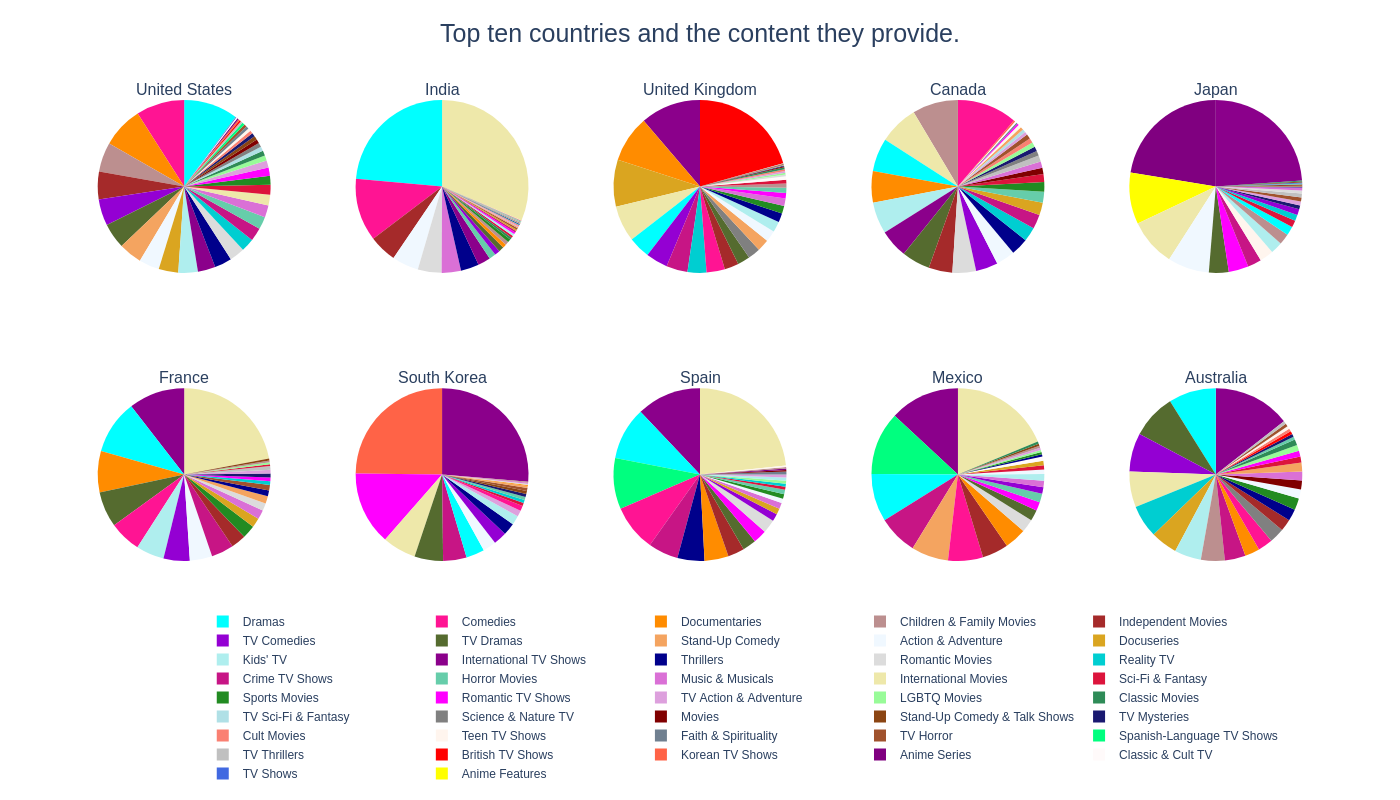

In [45]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1400, height=800, scale=1)
Image(img_bytes)

##### **1. Why did you pick the specific chart?**

**Answer Here.**

 This visualization is effective for illustrating the genre distribution in various countries. Each pie chart corresponds to a specific country, and the segments within the pie depict different genres. The size of each segment reflects the proportion of content within that genre for the respective country. This presentation facilitates a straightforward comparison of genre distribution across countries in a visually engaging manner.

##### **2. What is/are the insight(s) found from the chart?**

Answer Here
Action & Adventure and Dramas emerge as the most dominant genres across all countries, exhibiting the highest prevalence in numerous countries, underscoring their widespread popularity. The United States boasts a diverse content portfolio spanning multiple genres, notably excelling in Action & Adventure, Dramas, Comedies, and Documentaries.

India exhibits a notable emphasis on Independent Movies and Dramas, with a comparatively lower abundance of offerings in other genres.

The United Kingdom strikes a well-rounded balance, showcasing a mix of Drama, International TV Shows, and Documentaries.

Australia's content landscape stands out for its diversity, featuring a relatively equitable distribution across various genres, including Dramas, Comedies, International TV Shows, and Documentaries.


##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

**Positive Business Impact through Insights:**

**1- Strategic Content Planning:** By discerning genre preferences in diverse regions, businesses can tailor their content strategy to resonate with specific audience interests, fostering a more targeted and engaging approach.

**2- Global Market Insights:** The acquired insights enable businesses to identify countries where particular content genres enjoy heightened popularity. This valuable information informs strategic decisions related to market expansion, ensuring investments align with prevalent audience preferences for enhanced success and profitability.

**3- Effective Content Localization:** Comprehensive understanding of genre preferences across countries facilitates more effective content localization efforts. Aligning content with local tastes increases its appeal and viewership, potentially driving business growth and audience reach.


#### Chart - 9

In [46]:
# Chart - 9 visualization code
# number of unique values
netflix_movies['release_year'].nunique()

73

In [47]:
print(f'Oldest release year : {netflix_movies.release_year.min()}')
print(f'Latest release year : {netflix_movies.release_year.max()}')

Oldest release year : 1925
Latest release year : 2021


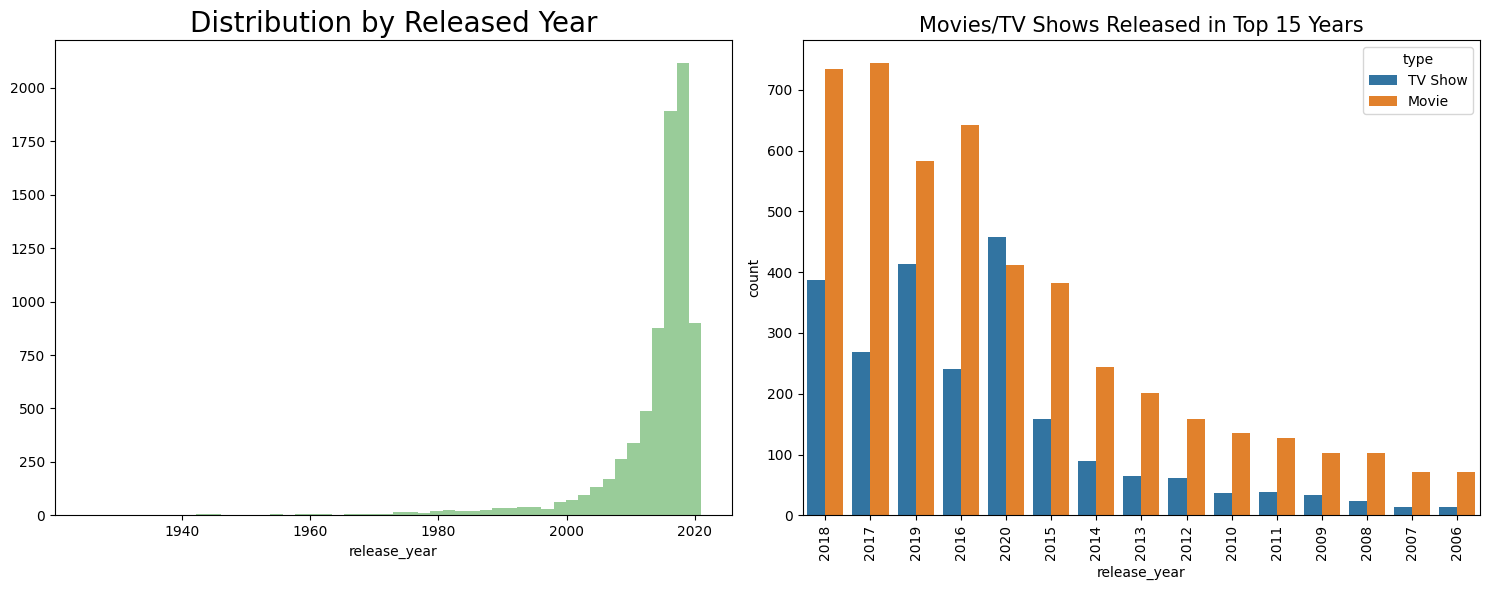

In [48]:


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Univariate Analysis
release_year_distribution = sns.distplot(netflix_movies['release_year'], ax=axes[0], kde=False, color='green')
release_year_distribution.set_title('Distribution by Released Year', size=20)

# Bivariate Analysis
top_years_count = sns.countplot(x="release_year", hue='type', data=netflix_movies,
                                order=netflix_movies['release_year'].value_counts().index[:15], ax=axes[1])
top_years_count.set_title('Movies/TV Shows Released in Top 15 Years', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


##### **1. Why did you pick the specific chart?**

Answer Here.


The selected combination of a histogram and a grouped bar plot facilitates both univariate and bivariate analyses. The histogram offers a snapshot of the distribution of movie release years, while the bar plot enables a comparison of the quantity of movies and TV shows released in the top 15 years.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**
The histogram depicting the distribution of release years reveals a broad pattern of movies being introduced on Netflix, commencing around 1980. The volume of releases exhibits a gradual increase, with substantial growth becoming evident from the year 2000 onward. The most prominent peak in the distribution occurs between 2010 and 2020, indicating a notable surge in the releases of both movies and TV shows during that period.

Regarding content types (Movies, TV shows), the bar graph underscores that the years 2017 and 2020 showcase the most significant trends. These years witness a substantial number of releases, encompassing both movies and TV shows, on the Netflix platform.


##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Certainly, the insights acquired have the potential to yield positive business outcomes. Through a comprehensive understanding of the release year distribution and emerging trends, businesses can make well-informed decisions concerning content acquisition, production, and effective marketing strategies.

#### Chart - 10

In [49]:
# Chart - 10 visualization code
#Ratings
# number of unique values
netflix_movies.rating.nunique()

14

**Rating Descriptions:**

**TV-Y:** Geared towards children aged 2-6, this rating signifies content suitable for all children and may include educational programming.

**TV-Y7:** Intended for children aged 7 and up, this rating may contain mild violence, comic mischief, or mildly scary content, not suitable for younger children.

**TV-Y7-FV:** Tailored for children aged 7 and up, this rating may feature more intense violence, with "FV" denoting "fantasy violence."

**TV-G:** Appropriate for all ages, this rating may include mild language or violence, but nothing overly intense.

**TV-PG:** Parental guidance is suggested, indicating content with material that parents may find inappropriate for younger children. It may encompass mild to moderate language, violence, or suggestive content.

**TV-14:** Aimed at viewers aged 14 and up, this rating may include intense violence, strong language, or sexual situations.

**TV-MA:** Intended for mature audiences, this rating may feature graphic violence, explicit sexual content, or strong language.

**G:** Suitable for all ages, generally aimed at young children and may include animated or family-friendly content.

**PG:** Parental guidance is suggested, indicating content with mild violence, language, or suggestive themes.

**PG-13:** Geared towards teens aged 13 and up, this rating may include intense violence, language, or suggestive content.

**R:** Intended for adults, this rating may feature graphic violence, strong language, or nudity.

**NC-17:** For mature audiences only, this rating may contain explicit sexual content or violence unsuitable for minors.

**NR:** Signifying either an absence of a rating or the content being unrated by a specific board.

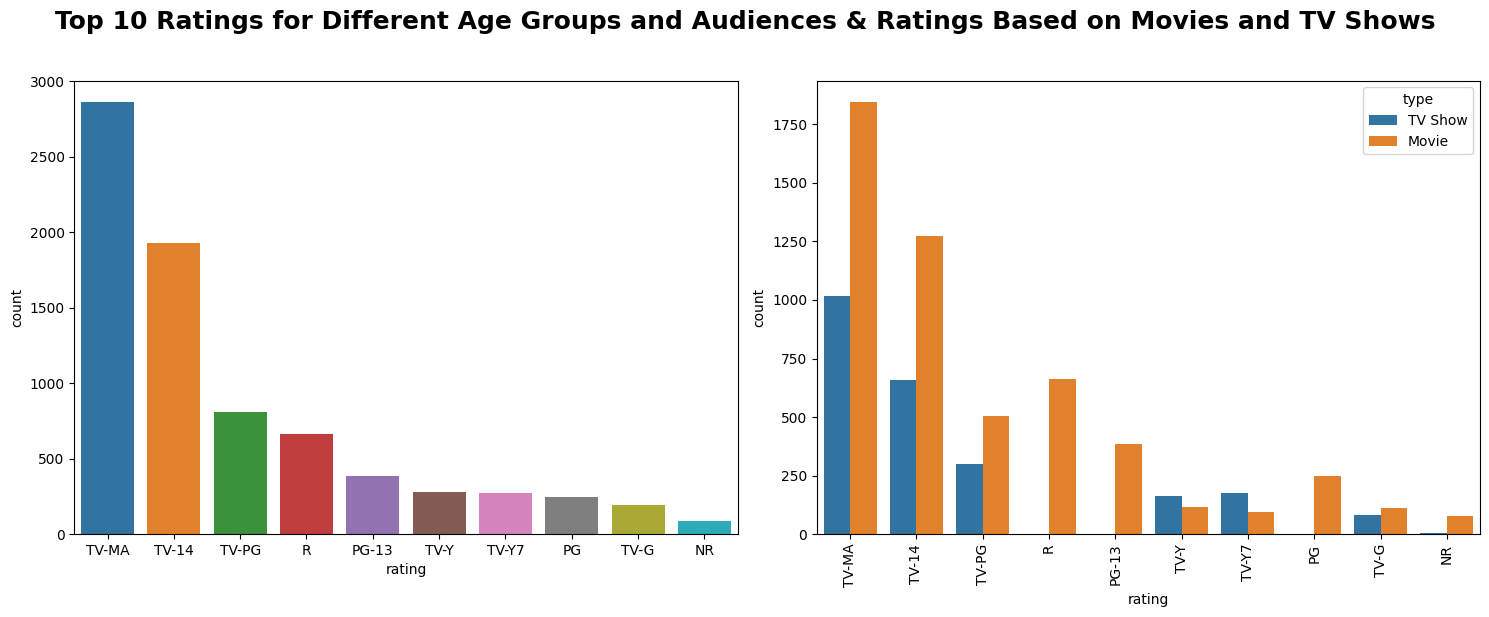

In [50]:
# Chart - 10 visualization code
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle('Top 10 Ratings for Different Age Groups and Audiences & Ratings Based on Movies and TV Shows',
             weight='bold', y=1.02, size=18)

# Univariate analysis
sns.countplot(x="rating", data=netflix_movies, order=netflix_movies['rating'].value_counts().index[0:10], ax=ax[0])

# Bivariate analysis
graph = sns.countplot(x="rating", data=netflix_movies, hue='type', order=netflix_movies['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


#####**1. Why did you pick the specific chart?**

**Answer Here.**
The selected combination of two count plots enables both univariate and bivariate analyses. The first plot provides insights into the top 10 ratings across all content, while the second plot offers a comparison of ratings specifically for movies and TV shows.


##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**


**TV-MA:** This rating designates content intended for mature audiences only, potentially featuring graphic violence, explicit sexual content, or strong language. It is the most prevalent rating for both movies and TV shows.

#####**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The observation that **TV-MA** is the predominant rating for both movies and TV shows can guide content strategies, audience targeting, programming decisions, and efforts to enhance content diversity. This insight has the potential to positively impact business by increasing viewership and customer satisfaction.

#### Chart - 11

In [51]:
# Chart - 11visualization code
# Replace the null values in director.
netflix_movies['director']=netflix_movies['director'].fillna('')


In [52]:
# Create a DataFrame with director counts
directors_list = netflix_movies.director.value_counts().reset_index().head(15)[1:]
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)

# Create a bar chart using Plotly
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True)

# Generate a list of 25 unique color codes using seaborn
color_palette = sns.color_palette('bright', n_colors=15).as_hex()
fig.update_traces(marker_color=color_palette)

# Add a title and adjust the layout
fig.update_layout(
    title={
        'text': 'Top 25 directors with the highest number of Movies and Tv Shows.',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=1200,
    height=500
)

# Show the plot
fig.show()


In [53]:
directors_list

,Directors name,Count
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
5,Jay Chapman,12
6,Youssef Chahine,12
7,Martin Scorsese,12
8,Steven Spielberg,10
9,David Dhawan,9
10,Lance Bangs,8


##### **1. Why did you pick the specific chart?**

**Answer Here.**

The selected chart presents the data in a visually intuitive and appealing manner, making it easy for viewers to identify the directors with the highest number of contributions on Netflix.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**
Raúl Campos and Jan Suter emerge as the directors with the highest count when considering both movies and TV shows available on Netflix.

#### Chart - 12

In [54]:
netflix_movies['listed_in'].value_counts().head(25)

Documentaries                                           334
Stand-Up Comedy                                         321
Dramas, International Movies                            320
Comedies, Dramas, International Movies                  243
Dramas, Independent Movies, International Movies        215
Kids' TV                                                205
Children & Family Movies                                177
Documentaries, International Movies                     172
Children & Family Movies, Comedies                      169
Comedies, International Movies                          161
Dramas, International Movies, Romantic Movies           153
Comedies, International Movies, Romantic Movies         139
Dramas                                                  117
Action & Adventure, Dramas, International Movies        117
International TV Shows, TV Dramas                       111
Dramas, International Movies, Thrillers                 109
Crime TV Shows, International TV Shows, 

In [55]:
import plotly.express as px
import pandas as pd

# Assuming netflix_movies is your DataFrame
counts = netflix_movies['listed_in'].value_counts().head(10)
average = counts.mean()

df = pd.DataFrame({'Category': counts.index, 'Count': counts.values})
colors = px.colors.qualitative.Dark24[:10]

fig = px.bar(df, x='Count', y='Category', color='Category', color_discrete_sequence=colors, orientation='h')
fig.add_vline(x=average, line_color='red')
fig.update_layout(title='Top 10 Genres with Average Count', title_x=0.5)

fig.show()


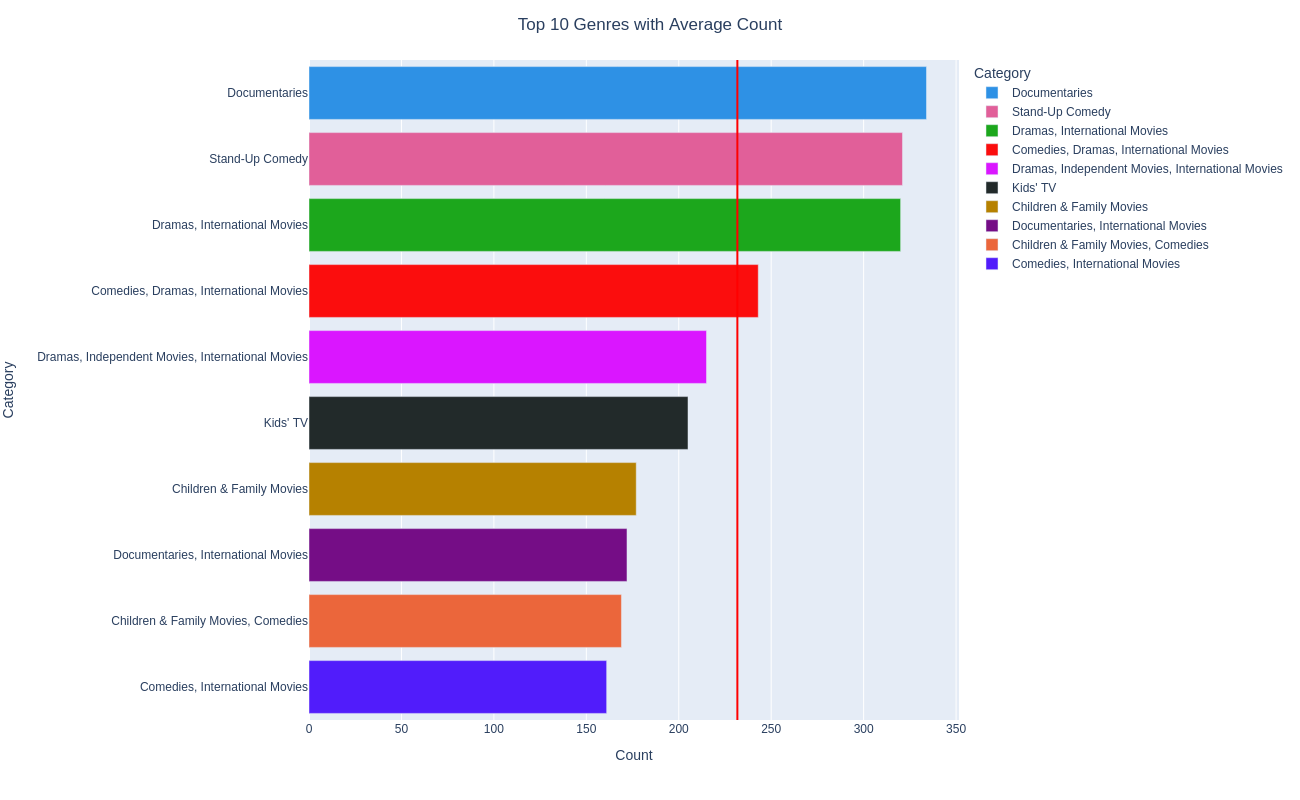

In [56]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1300, height=800, scale=1)
Image(img_bytes)

##### **1. Why did you pick the specific chart?**

**Answer Here.**
The selected chart provides a clear presentation of the data, enabling viewers to readily compare the average counts across various genres.

#####**2. What is/are the insight(s) found from the chart?**

**Answer Here**

The mean count of genres within the top 10 categories falls within the range of 200 to 250. The genre boasting the highest count across all genres is Documentaries, registering at 334.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**
Certainly! The obtained insights can play a pivotal role in generating favorable outcomes for streaming platforms such as Netflix or any other entity in the entertainment sector. Leveraging these insights, companies can fine-tune their content strategies, elevate viewer satisfaction, expand their audience base, and, ultimately, foster positive business outcomes marked by heightened viewership, improved customer retention, and increased revenue growth.










#### Chart - 13 - Correlation Heatmap







In [57]:
# Correlation Heatmap visualization code
# Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_movies['target_ages'] = netflix_movies['rating'].replace(ratings)





In [58]:
# Assuming netflix_movies is your DataFrame
netflix_movies['count'] = 1
top_countries = netflix_movies.groupby('country')['count'].sum().sort_values(ascending=False).head(10).index
filtered_df = netflix_movies[netflix_movies['country'].isin(top_countries)]

heatmap_data = pd.crosstab(filtered_df['country'], filtered_df['target_ages'], normalize='index').T
heatmap_data


country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Adults,0.446328,0.277228,0.678261,0.255688,0.364444,0.77,0.469945,0.835821,0.513854,0.471550
Kids,0.180791,0.000000,0.095652,0.016251,0.008889,0.02,0.027322,0.022388,0.093199,0.089601
Older Kids,0.225989,0.039604,0.060870,0.160347,0.271111,0.07,0.120219,0.044776,0.204030,0.195553
Teens,0.146893,0.683168,0.165217,0.567714,0.355556,0.14,0.382514,0.097015,0.188917,0.243296


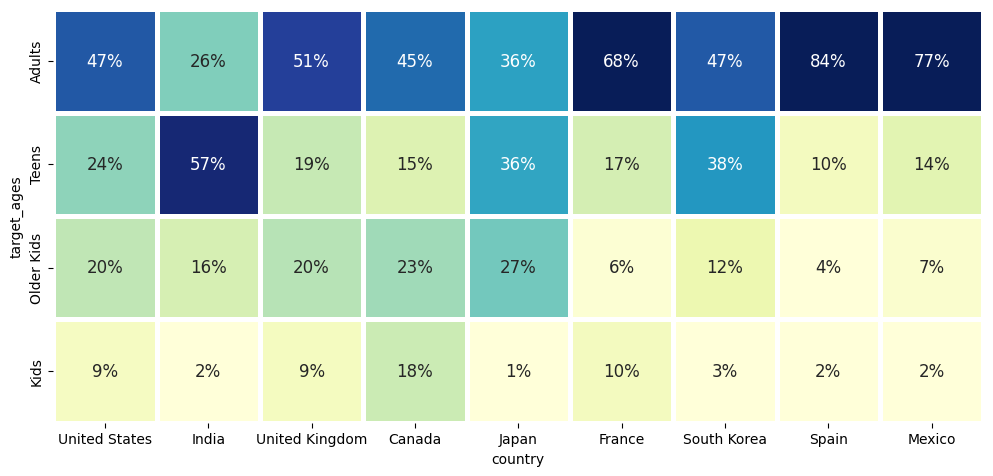

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=heatmap_data.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()




**1. Why did you pick the specific chart?**


**Answer Here**


A heatmap proves to be an effective option for illustrating the connections between two categorical variables, specifically countries and age groups. It provides a visually intuitive way to depict patterns, trends, and comparisons within and across various categories.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**
 The provided data reveals fluctuating levels of interest in the subject across diverse countries and target age groups, yielding the following key observations:

**1. Spain:** Stands out prominently, registering the highest adult interest at 84%. This underscores a robust engagement among Spanish adults in the subject matter.

**2. France:** Trails closely with 68% of adults expressing interest, signifying a significant level of involvement in the topic.

**3. India:** Leads in teenage interest, boasting the highest percentage at 57%. This points to a noteworthy enthusiasm among the younger demographic in India.

**4. United Kingdom:** Displays a noteworthy adult interest rate of 51%, indicating a substantial engagement in the subject.

**5. Mexico:** Exhibits a substantial level of interest, with 77% of adults expressing engagement with the subject.

**6. South Korea, United States:** Both countries report a 47% interest rate among adults, signaling a moderate level of involvement in these regions.

**7. Japan:** Presents a moderate level of interest across adults and teens, with 36% participation from each group.

**8. Canada:** Records the lowest interest rate among the listed countries, with 45% of adults expressing interest.

In conclusion, these findings underscore the varied levels of interest in the subject among different countries and target age groups. Specifically, Spain, France, India, and Mexico exhibit higher levels of interest among adults, while Canada demonstrates comparatively lower interest when compared to other nations.


3.**Will the gained insights help creating a positive business impact?**

**Answer Here**
The acquired insights have the potential to generate positive business outcomes, contingent upon the context and specific objectives of the business.

**1. Product Development:**

  * Leveraging the obtained insights to refine and enhance existing products or to guide the creation of new ones.

**2. Market Expansion:**

   * Utilizing the gained understanding to identify opportunities for entering new markets or expanding the reach within existing ones.

**3. Partnerships and Collaborations:**

   * Building strategic alliances or collaborations based on the insights to foster mutually beneficial relationships and achieve shared objectives.



#### Chart - 14 - Correlation Heatmap

In [60]:
# Assuming netflix_movies is your DataFrame
netflix_movies['count'] = 1
data1 = netflix_movies.groupby('listed_in')[['listed_in', 'count']].sum().sort_values(by = 'count', ascending = False).reset_index()[:10]
data1 = data1['listed_in']

In [61]:
data1

0                                       Documentaries
1                                     Stand-Up Comedy
2                        Dramas, International Movies
3              Comedies, Dramas, International Movies
4    Dramas, Independent Movies, International Movies
5                                            Kids' TV
6                            Children & Family Movies
7                 Documentaries, International Movies
8                  Children & Family Movies, Comedies
9                      Comedies, International Movies
Name: listed_in, dtype: object

In [62]:
df_heatmap1 = netflix_movies.loc[netflix_movies['listed_in'].isin(data1)]
df_heatmap1 = pd.crosstab(df_heatmap1['listed_in'],df_heatmap1['target_ages'],normalize = "index").T
df_heatmap1

listed_in,Children & Family Movies,"Children & Family Movies, Comedies","Comedies, Dramas, International Movies","Comedies, International Movies",Documentaries,"Documentaries, International Movies","Dramas, Independent Movies, International Movies","Dramas, International Movies",Kids' TV,Stand-Up Comedy
target_ages,,,,,,,,,,
Adults,0.000000,0.000000,0.345679,0.484472,0.386228,0.377907,0.660465,0.468750,0.000000,0.894081
Kids,0.564972,0.177515,0.004115,0.012422,0.059880,0.063953,0.004651,0.006250,0.565854,0.000000
Older Kids,0.435028,0.816568,0.123457,0.099379,0.254491,0.238372,0.083721,0.109375,0.434146,0.018692
Teens,0.000000,0.005917,0.526749,0.403727,0.299401,0.319767,0.251163,0.415625,0.000000,0.087227


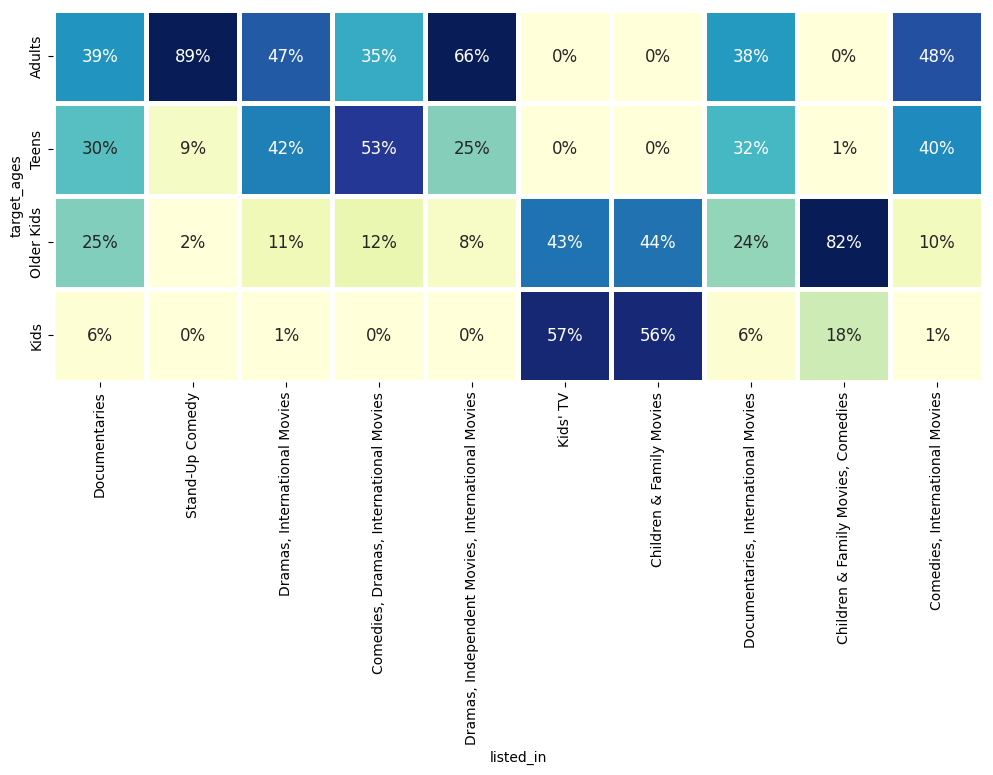

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_heatmap1 is your DataFrame

top = ['Documentaries', 'Stand-Up Comedy', 'Dramas, International Movies',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', "Kids' TV",
       'Children & Family Movies', 'Documentaries, International Movies',
       'Children & Family Movies, Comedies',
       'Comedies, International Movies']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

# Filter the DataFrame based on age_order and top
filtered_df = df_heatmap1.loc[age_order, top]

# Create a heatmap using seaborn
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(data=filtered_df,
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})

plt.show()




##### **1. Why did you pick the specific chart?**



**Answer Here.**
Utilizing a heatmap is apt in this context as it enables the representation of data through color coding. The intensity of colors serves as a visual indicator for the occurrence or proportion of movie genres within each age group.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Stand-up comedy emerges as the genre with the most substantial appeal to adults, commanding an audience share of 89%. Additionally, Children & Family Movies, Comedies exhibit significant popularity, drawing in an audience of 82%. TV shows designed for older kids, adults, and children collectively capture a diverse audience, ranging from approximately 66% to 53%.


#### Chart - 15

In [64]:
# Assuming netflix_movies1 is your DataFrame

# Replace netflix_movies1 with netflix_movies
country_count = netflix_movies['country'].value_counts().sort_values(ascending=False)
top_countries = pd.DataFrame(country_count.head(11))

# Display the top countries
print(top_countries)




                country
United States      3062
India               923
United Kingdom      397
Japan               226
South Korea         183
Canada              177
Spain               134
France              115
Egypt               101
Turkey              100
Mexico              100


In [65]:
import plotly.express as px

# Assuming netflix_movies is your new dataset
netflix_movies = dict(
    number=[3062, 923, 397, 226, 183, 177, 134, 115, 101, 100],
    country=["United States", "India", "United Kingdom", "Canada", "Spain", 'Turkey', 'Philippines', 'France',
             'South Korea', 'Australia']
)

fig = px.funnel(netflix_movies,
                x='number',
                y='country',
                title='Funnel Chart- Top 10 Countries by Number of Movies',
                labels={'number': 'Number of Movies', 'country': 'Country'},
                color_discrete_sequence=px.colors.qualitative.Plotly,
                height=1000,
                width=900,
                template='plotly_dark'
                )
fig.show()


1.**Why did you pick the specific chart?**

**Answer Here.**



Funnel charts are commonly employed to illustrate a progressive decrease in data across various stages or categories. In this particular instance, the chart effectively displays the diminishing count of movies in the top 10 countries, presenting the decline from the highest to the lowest values.

2.**What is/are the insight(s) found from the chart?**

**Answer Here.**



The film industry is most prominent in the United States, boasting a staggering 3062 movies, showcasing its dominant position. Following closely, India emerges as the second-largest contributor with 923 films, underscoring its substantial influence in the global movies and TV shows market.


3.**Will the gained insights help creating a positive business impact?**


**Answer Here.**


Certainly! The acquired insights can contribute positively to business in various aspects:

**1. Recruitment of Skilled Individuals:** This information is particularly beneficial for companies seeking to hire talented professionals in fields such as filmmaking, writing, acting, or technical roles.

**2. Strategic Market Expansion:** The revealed insights highlight countries with a substantial number of movies, such as the United States and India. This valuable information can assist businesses in strategically expanding their operations and focusing on these markets for activities like distribution, marketing, and establishing partnerships.

# 4. **Hypothesis Testing**





In [66]:
netflix_hypothesis = netflix_movies_copy
# Display the head of df_hypothesis
netflix_hypothesis


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [67]:
#filtering movie from Type_of_show column
netflix_hypothesis = netflix_hypothesis[netflix_hypothesis["type"] == "Movie"]

In [68]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_hypothesis['target_ages'] = netflix_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
netflix_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

In [69]:
netflix_hypothesis['target_ages'] = pd.Categorical(netflix_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

netflix_hypothesis['duration'] = netflix_hypothesis['duration'].astype(str)  # Convert to string type
netflix_hypothesis['duration'] = netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

netflix_hypothesis.head(3)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens


In [70]:
#group_by duration and target_ages
group_by_= netflix_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [71]:
# Filter rows for 'Kids' and 'Older Kids'
A = netflix_hypothesis.loc[netflix_hypothesis['target_ages'] == 'Kids', 'duration']
B = netflix_hypothesis.loc[netflix_hypothesis['target_ages'] == 'Older Kids', 'duration']

# Calculate mean and standard deviation
M1, S1 = A.mean(), A.std()
M2, S2 = B.mean(), B.std()

print('Mean for movies rated for Kids: {}\nMean for movies rated for Older Kids: {}'.format(M1, M2))
print('Std for movies rated for Older Kids: {}\nStd for movies rated for Kids: {}'.format(S2, S1))


Mean for movies rated for Kids: 66.48689138576779
Mean for movies rated for Older Kids: 92.02464788732394
Std for movies rated for Older Kids: 31.182576758429978
Std for movies rated for Kids: 31.739464779840176


In [72]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val)

267 852
dof 1117
SP_2 = 999.0491470682085
SP 31.6077387212089
tvalue -11.51992627853396


In [73]:
#t-distribution
stats.t.ppf(0.025,dof)


-1.9620900365868952

In [74]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

**Based on your chart experiments, define two hypothetical statements from the dataset. In the next two questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.**

**Hypothetical Statement - 1**

**1.State Your research hypothesis as a null hypothesis and alternate hypothesis.**

**Answer Here.**

HO:Movies rated for kids and older kids are at least two hours long.(Null Hypothesis)

H1:Movies rated for kids and older kids are not at least two hours long.(Alternate Hypothesis)

2.Perform an appropriate statistical test.





In [75]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [76]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

**Answer Here.**

**t-value** is not in the range, the **null hypothesis is rejecte**d.

**As a result, movies rated for kids and older kids are not at least two hours long.**

**Hypothetical Statement - 2**

**1.State Your research hypothesis as a null hypothesis .**

**Answer Here.**

H1:The duration which is more than 90 mins are movies

HO:The duration which is more than 90 mins are NOT movies





In [77]:
#making copy of df_clean_frame
netflix_hypothesis=netflix_movies_copy
#head of df_hypothesis
netflix_hypothesis.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [78]:
netflix_hypothesis['duration']= netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

In [79]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
netflix_hypothesis.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [80]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])

In [81]:
# Perform Statistical Test to obtain P-Value
#group_by duration and TYPE
group_by_= netflix_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group1=group_by_.mean().reset_index()
group1

,type,duration
0,Movie,99.307978
1,TV Show,1.775934


In [82]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.307978
dtype: float64
Std  duration    1.596359
dtype: float64


In [83]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val)

5377 2410
dof 7785
SP_2 = duration    253.64841
dtype: float64
SP duration    15.926343
dtype: float64
tvalue duration    249.818565
dtype: float64


Which statistical test have you done to obtain P-Value?


t-distribution





In [84]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602687544602204

In [85]:
#t-distribution
stats.t.ppf(0.975,dof)

1.96026875446022

**Answer Here.**

Because the t-value is not in the range, the null hypothesis is rejected.

**As a result, The duration which is more than 90 mins are movies**

# **5. Feature Engineering & Data Pre-processing**

In [86]:
netflix_movies_copy.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [87]:
# Combining all the clustering attributes into a single column
netflix_movies_copy['clustering'] = (netflix_movies_copy['director'] + ' ' + netflix_movies_copy['cast'] +' ' +
                                 netflix_movies_copy['country'] +' ' + netflix_movies_copy['listed_in'] +
                                 ' ' + netflix_movies_copy['description'])


In [88]:
netflix_movies_copy['clustering'] = netflix_movies_copy.apply(lambda row: ' '.join(map(str, row)), axis=1)


In [89]:
netflix_movies_copy['clustering'][25]

's26 Movie (T)ERROR Lyric R. Cabral, David Felix Sutcliffe nan United States June 30, 2016 2015 NR 84 Documentaries This real-life look at FBI counterterrorism operations features access to both sides of a sting: the government informant and the radicalized target. nan'

# **Textual Data Preprocessing**

In [90]:
# Expand Contraction
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
nltk.download('all',quiet=True)
from PIL import Image

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)

In [91]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
nltk.download('all', quiet=True)
from PIL import Image

def transform_text(text):
    # Expand Contractions (You can use a library like contractions for this)
    # Assuming you have a function expand_contractions(text) for expansion
    # Example: text = expand_contractions(text)

    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove words and digits containing digits
    text = re.sub(r'\w*\d\w*', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    stopwords_set = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stopwords_set]

    # Remove extra white spaces
    text = ' '.join(words)

    # Rephrase Text (You can add specific rephrasing functions here)

    # Tokenization (if not already done)
    words = nltk.word_tokenize(text)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)


In [92]:
netflix_movies_copy['Clean_Text'] = netflix_movies_copy['clustering'].apply(transform_text)

In [93]:
netflix_movies_copy["Clean_Text"][50]

'movie bc roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united state south africa june pg action adventure fierce mammoth hunter dleh set impossible journey rescue woman love vicious warlord save people village roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united state south africa action adventure fierce mammoth hunter dleh set impossible journey rescue woman love vicious warlord save people village'

# **Text Vectorization**

**TF-IDF combines two metrics: Term frequency (TF) and inverse document frequency (IDF).**
Term Frequency (TF) is a metric that gauges how frequently a term occurs within a document. The underlying assumption is that the higher the frequency of a term in a document, the greater its relevance to that specific document. The calculation for TF is based on the following formula:

**TF(t, d)** = (Number of times term t appears in document d) / (Total number of terms in document d)

**Inverse Document Frequency (IDF):**
This metric assesses the significance of a term within a set of documents. It assigns greater weight to terms that have lower frequency across the entire collection. The calculation is based on the following formula:


**IDF(t) = log_e(Total number of documents / Number of documents containing term t)**

In [94]:
bag_of_words = netflix_movies_copy.Clean_Text

In [95]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [96]:
print(X.shape)

(7787, 20000)


In [97]:
t_vectorizer.get_feature_names_out()

array(['aadarsh', 'aakash', 'aamir', ..., 'şimşek', 'şinasi', 'ştar'],
      dtype=object)

Which text vectorization technique have you used and why?


**Answer Here.**


The text vectorization technique used is TF-IDF (Term Frequency-Inverse Document Frequency). This technique is employed through the TfidfVectorizer class from the scikit-learn library.

TF-IDF is a popular text vectorization method that reflects the importance of a term in a document relative to its occurrence in a collection of documents. Here's a brief explanation of why TF-IDF is commonly used:

**1. Term Frequency (TF):** It measures how often a term appears in a document. The more frequent a term is in a document, the higher its TF value.

**2. Inverse Document Frequency (IDF):** It measures how unique or important a term is across the entire collection of documents. Terms that appear in many documents have lower IDF values, while terms appearing in fewer documents have higher IDF values.

**3. TF-IDF Calculation:** TF-IDF is calculated by multiplying the TF of a term in a document by its IDF across the entire collection. This results in a numerical representation of the importance of each term in a specific document with respect to the entire corpus.

# **Dimesionality Reduction**

**Do you think that dimensionality reduction is needed? Explain Why**

**Answer Here.**
Utilizing PCA for dimensionality reduction in the dataset involves identifying principal components, which represent the directions along which the data exhibits the greatest variability. These components are arranged based on the extent to which they explain variance within the data.









In [98]:
# DImensionality Reduction (If needed)
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())

PCA()

**Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)**


**Answer Here**


PCA has the capability to identify and extract the most important features from a dataset. It reconfigures the initial features into a fresh set of variables known as principal components. These components, formed through linear combinations of the original features, effectively encapsulate the highest degree of variation found within the data.

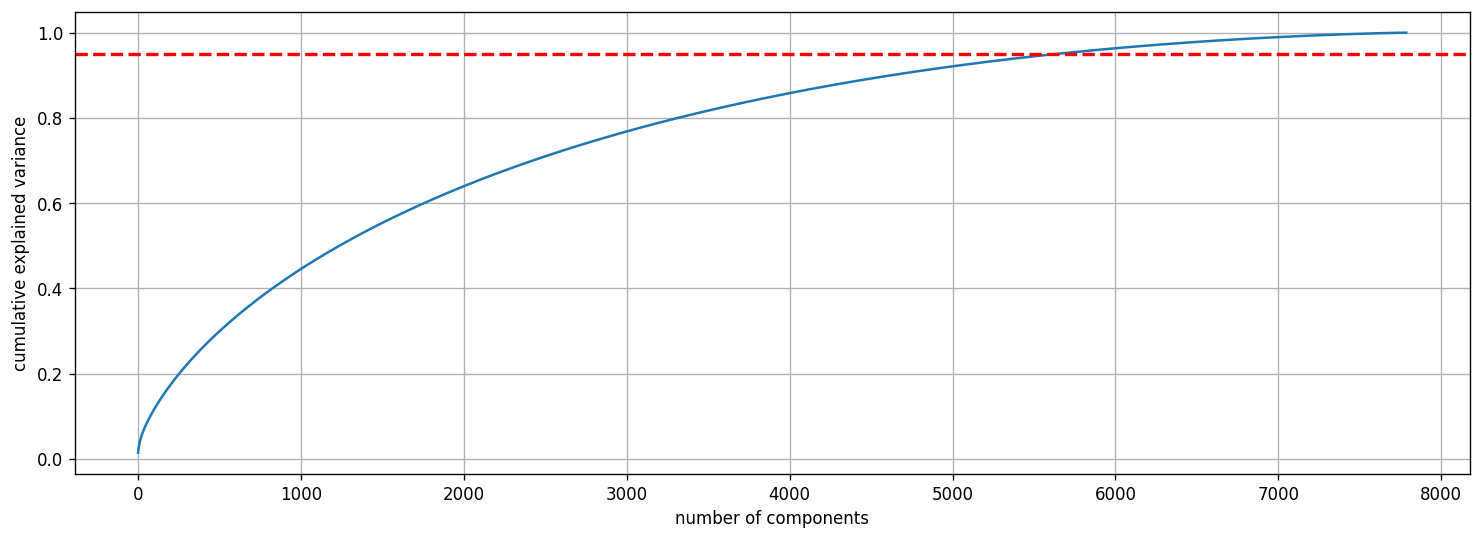

In [99]:
# Lets plot explained var v/s comp to check how many components to be considered.
 #explained var v/s comp
# Add a grid to the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi=120)
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--',linewidth=2, label='95% Explained Variance')
plt.grid()
plt.show()

**The plot helps in determining the number of components to consider for dimensionality reduction. You can select the number of components where the cumulative explained variance reaches a satisfactory threshold, such as 95%. The point where the curve intersects or is closest to the threshold line can guide you in choosing the appropriate number of components for your analysis.**

In [100]:
# Import the necessary libraries
from sklearn.decomposition import PCA
# Create an instance of PCA with the desired explained variance ratio
pca_tuned = PCA(n_components=0.95)
# Fit the PCA model on the input data, X, which is converted to a dense array
pca_tuned.fit(X.toarray())
# Transform the input data, X, to its reduced dimensional representation
X_transformed = pca_tuned.transform(X.toarray())
# Print the shape of the transformed data to see the number of samples and transformed features
print(X_transformed.shape)


(7787, 5635)


In [101]:
X_transformed

array([[ 0.14894717, -0.03623148, -0.00454855, ...,  0.0005139 ,
        -0.00157819, -0.0030606 ],
       [-0.07675482, -0.02893952,  0.02351625, ...,  0.01365096,
         0.00440716,  0.00324304],
       [-0.08300297, -0.03833864, -0.01228033, ..., -0.00405922,
         0.00249018, -0.00068338],
       ...,
       [ 0.00659811,  0.15394979,  0.20543539, ...,  0.00132251,
        -0.00766892, -0.00996226],
       [ 0.12928096,  0.00321958,  0.01851949, ...,  0.00612692,
         0.01247064,  0.00750602],
       [-0.02272661,  0.24812686,  0.13006547, ..., -0.00527766,
        -0.00684185, -0.00270817]])

# **6. ML Model Implementation**

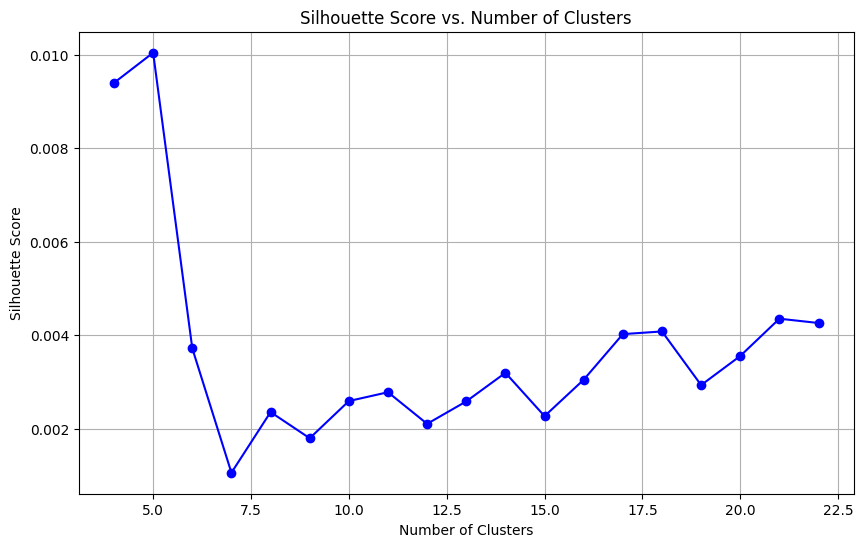

In [102]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming X_transformed is your data after PCA

# Initialize a range of cluster numbers
cluster_range = range(4, 23)

# Store silhouette scores for each cluster number
silhouette_scores = []

# Fit KMeans models for different cluster numbers
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=5)
    cluster_labels = kmeans.fit_predict(X_transformed)
    silhouette_avg = silhouette_score(X_transformed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


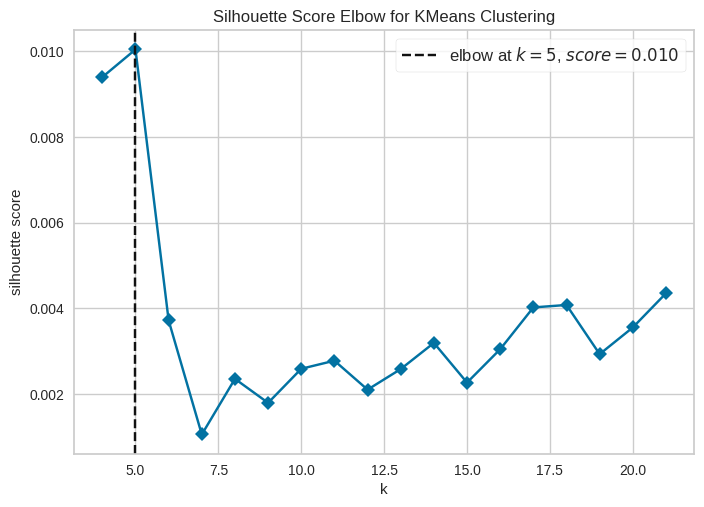

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [103]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model with a random_state of 5
model = KMeans(random_state=5)

# Initialize the KElbowVisualizer with the KMeans model and desired parameters
visualizer = KElbowVisualizer(model, k=(4, 22), metric='silhouette', timings=False, locate_elbow=True)

# Fit the visualizer on the transformed data
visualizer.fit(X_transformed)

# Display the elbow plot
visualizer.show()

**The plot will also indicate the "elbow" point, which represents the recommended number of clusters based on the selected metric.Using elbow plot with the optimal number of 5 clusters** .

In [104]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.008905728920131209


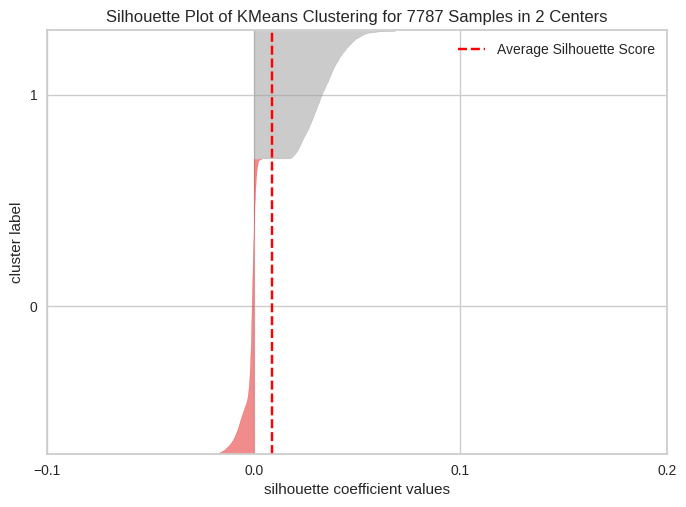

For n_clusters = 3, silhouette score is 0.008511211615375078


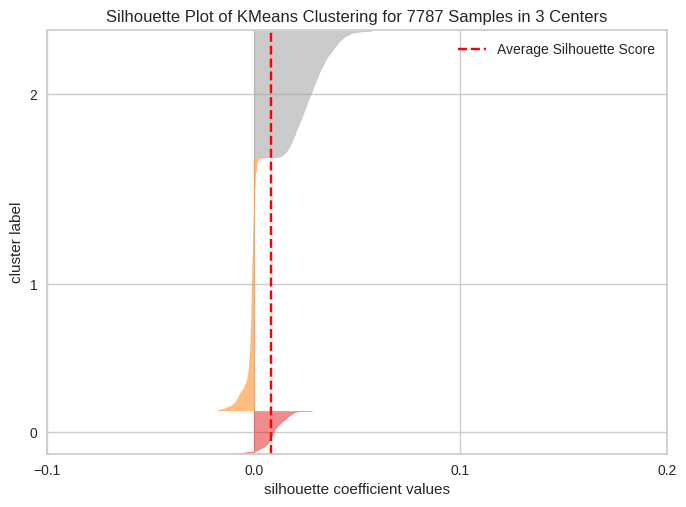

For n_clusters = 4, silhouette score is 0.009395512710416259


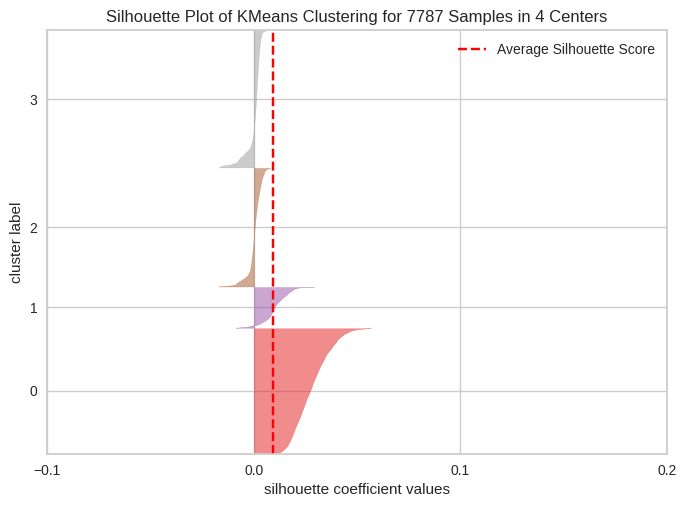

For n_clusters = 5, silhouette score is 0.010040222106119162


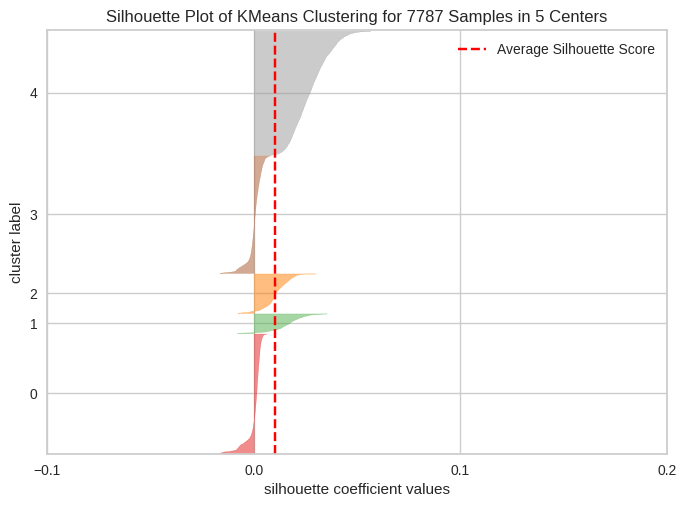

For n_clusters = 6, silhouette score is 0.0037166090603460047


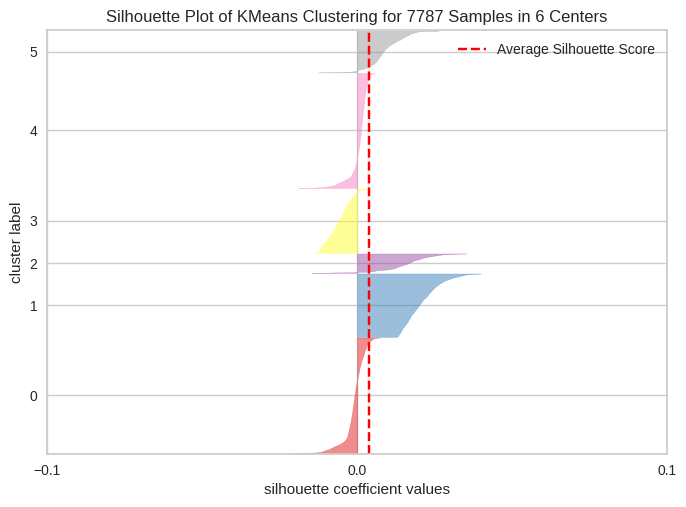

For n_clusters = 7, silhouette score is 0.001056563094627105


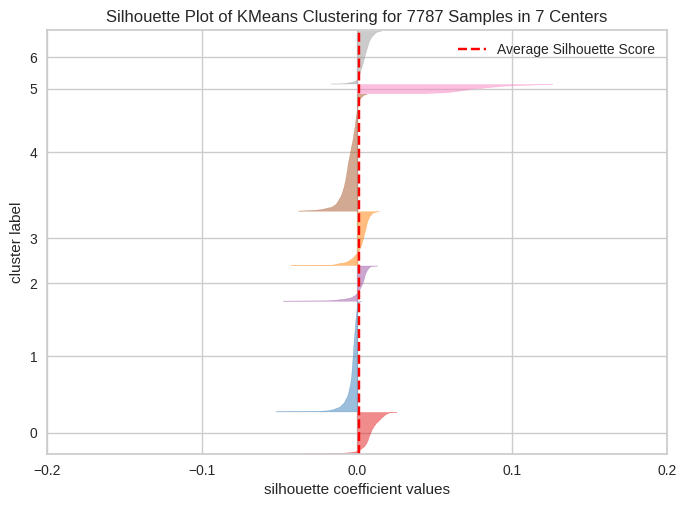

For n_clusters = 8, silhouette score is 0.002353972556319189


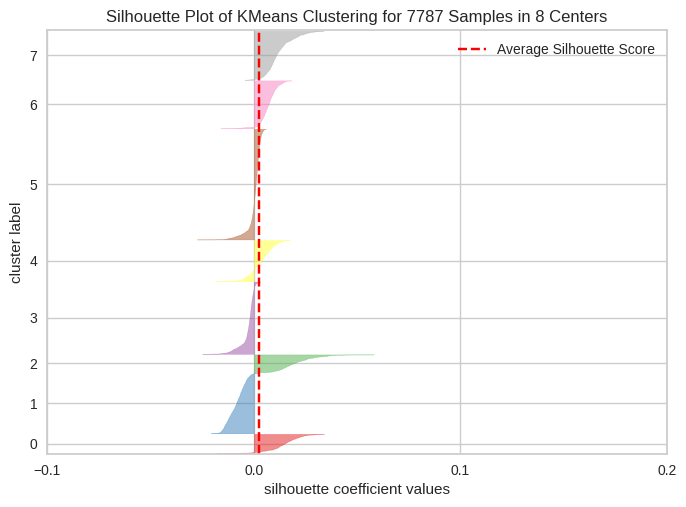

For n_clusters = 9, silhouette score is 0.0017942336283847842


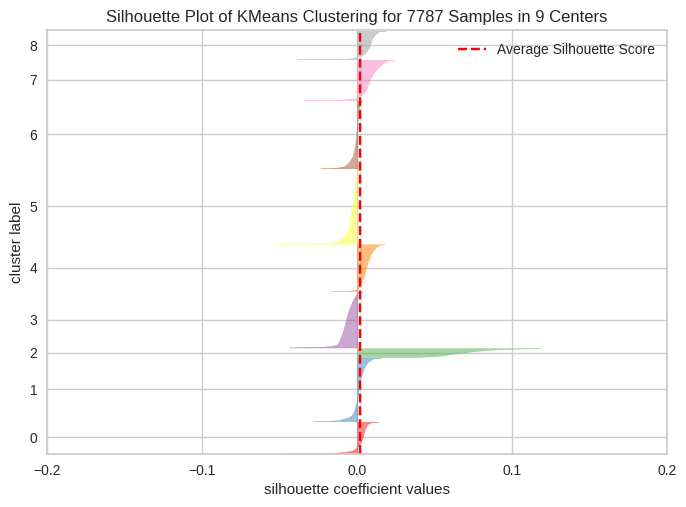

For n_clusters = 10, silhouette score is 0.00258964357943082


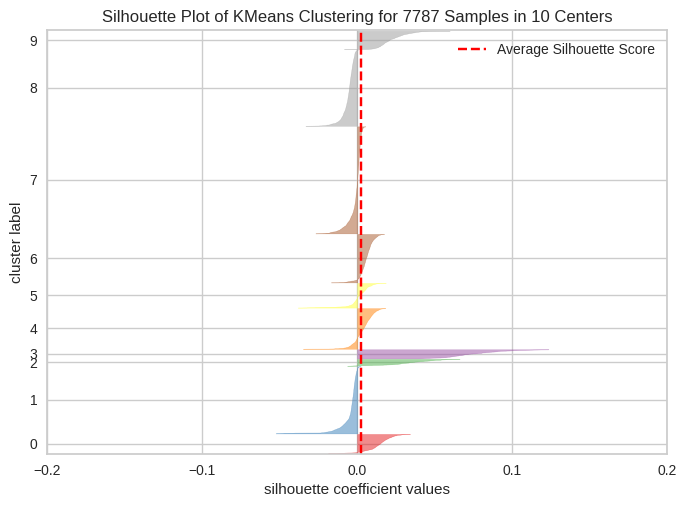

For n_clusters = 11, silhouette score is 0.0027783790521963983


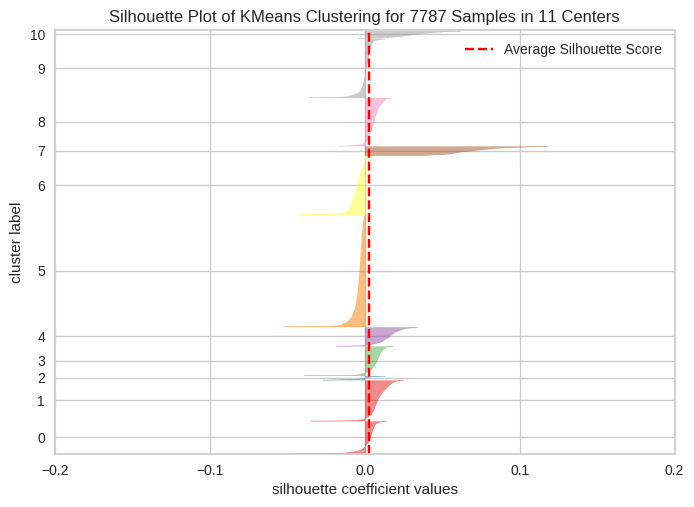

For n_clusters = 12, silhouette score is 0.0021022215194708


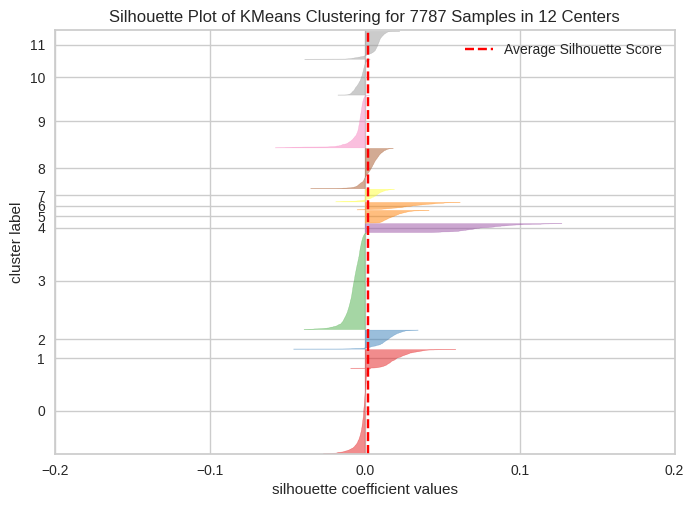

For n_clusters = 13, silhouette score is 0.0025827788331492427


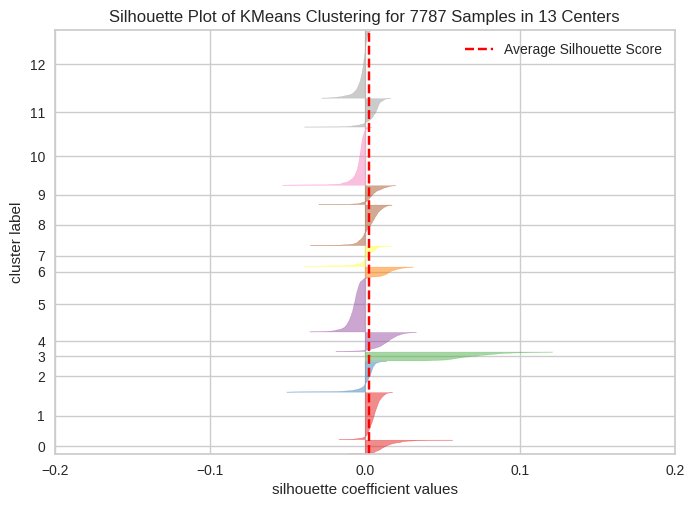

For n_clusters = 14, silhouette score is 0.0031934161838912314


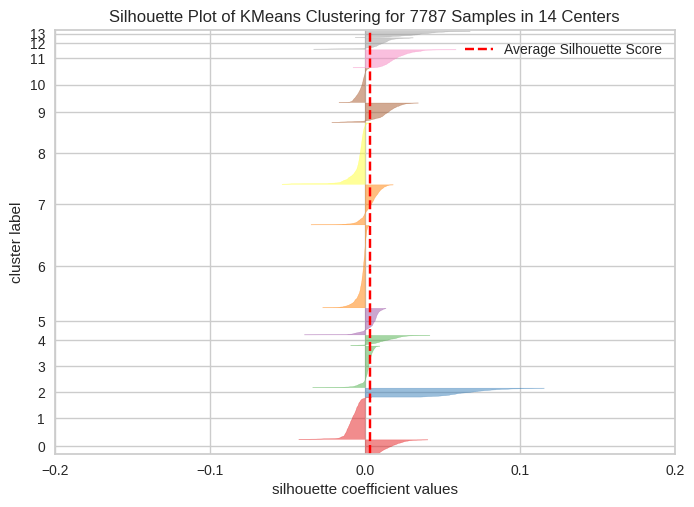

In [105]:
silhouette_score_analysis(15)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from joblib import Parallel, delayed

# Create a figure with a specific size and resolution
plt.figure(figsize=(10, 6), dpi=120)

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Define a function to fit KMeans and calculate WCSS for a given number of clusters
def calculate_wcss(i, X_transformed):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    return kmeans.inertia_

# Use parallel processing to speed up the computation
wcss = Parallel(n_jobs=-1)(delayed(calculate_wcss)(i, X_transformed) for i in range(1, 22))

# Plot the number of clusters against the WCSS
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Create a figure with a larger size and resolution
plt.figure(figsize=(20, 8), dpi=120)

# Initialize a KMeans model with 15 clusters
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=9)

# Fit the KMeans algorithm to the transformed data
kmeans.fit(X_transformed)

# Predict the labels of the clusters
label = kmeans.fit_predict(X_transformed)

# Get unique labels from the predictions
unique_labels = np.unique(label)

# Plot the results
for i in unique_labels:
    # Scatter plot the points belonging to each cluster
    plt.scatter(X_transformed[label == i, 0], X_transformed[label == i, 1], label=i)

# Display a legend to identify the clusters
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Add cluster values to the dateframe.
netflix_movies_copy['cluster_number'] = kmeans.labels_

In [ ]:
netflix_movies_copy.head(1)

In [ ]:
# Count the number of movies or TV shows in each cluster
cluster_content_count = netflix_movies_copy['cluster_number'].value_counts().reset_index().rename(columns={'index': 'clusters', 'clusters': 'Movies/TV_Shows'})

# Print the cluster content count
print(cluster_content_count)


In [ ]:
#word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def word_count(category):
  print("Exploring Cluster", category)
  col_names = ['type','title','country','rating','listed_in','description']
  for i in col_names:
    df_word_cloud = netflix_movies[['cluster_number',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category]
    text = " ".join(word for word in df_word_cloud[i])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="#FFC0CB",width=500,height=500).generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    print("Looking for insights from", i ,"Movies/TV Shows")

    plt.show()





In [ ]:
word_count(9)

Cluster 9 in a dataset contains a total of 232 words. The most frequently occurring words in this cluster are as follows:

**Type** -  Movie & Tv shows

**Title** - Broadway,Remastered,Christmas ,Friends Orchestra

**Country**- United Kingdom,Argentina,United States,India

**Rating** -TV-MA,PG-TV

**Listed_in** -  Dramas International,Musical Dramas,Musicial
            Documentaries,Comedies International

**Description**- Documentary ,Music,One,Bad,Tour ,Love.

In [ ]:
word_count(11)

Cluster 11 in a dataset contains a total of 410 words. The most frequently occurring words in this cluster are as follows:

**Type** -  Movie & Tv shows

**Title** - Special, America,Time,Live,Comedy, Netflix Alive,
  Martin

**Country** - United States,Brazil,Mexico,Italy

**Rating** -TV-MA,TV-PG

**Listed_in** - Tv-Comedies, Comedy Stand, Talk shows
            

**Description**- Stand Comedy, Comic, Take, Life, Live, Share,Stories.

# 7- **Recommender system**



A **recommender system is a type of information filtering system that suggests items to users based on their preferences**, interests, or past behavior. **It is commonly used in various applications such as e-commerce websites, streaming platforms, social media, and more.** The goal of a recommender system is to provide personalized recommendations that are relevant and helpful to the individual user.





**Content-based filtering:** This approach recommends items similar to the ones a user has liked or interacted with in the past. It analyzes the content or attributes of items and finds similar items to recommend. For example, if a user enjoys watching action movies, the system may recommend other action movies based on genre, actors, or plot.








































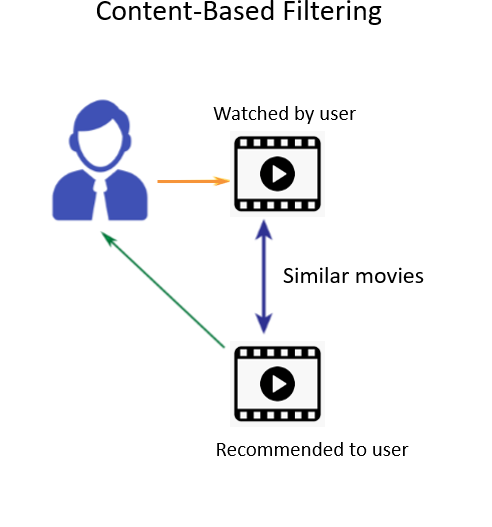

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_movies_copy['description'] = netflix_movies_copy['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_movies_copy['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [ ]:
cosine_sim

In [ ]:
indices = pd.Series(netflix_movies.index, index=netflix_movies_copy['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_movies_copy['title'].iloc[movie_indices]



In [ ]:
netflix_movies_copy['title'][1:70]

In [ ]:
get_recommendations( '14 Cameras',cosine_sim)

#**8- Conclusion**

**1-** It is interesting to note that the majority of the content available on Netflix consists of movies. However, in recent years, the platform has been focusing more on TV shows.

**2-** Most of these shows are released either at the end or the beginning of the year.

**3-** The United States and India are among the top five countries that produce all of the available content on the platform. Additionally, out of the top ten actors with the maximum content, six of them are from India.

**4-** When it comes to content ratings, TV-MA tops the charts,
 indicating that mature content is more popular on Netflix.

**5-** The value of k=15 was found to be optimal for clustering the data, and it was used to group the content into ten distinct clusters.

**6-** Using this data, a Content based recommender system was created using cosine similarity, which provided recommendations for Movies and TV shows.

# **9. Future Work**

- Integrating this dataset with external sources such as IMDB ratings,books clsutering ,Plant based Type clustering  can lead to numerous intriguing discoveries.

- By incorporating additional data, a more comprehensive recommender system could be developed, offering enhanced recommendations to users. This system could then be deployed on the web for widespread usage.

# ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***